#Load Library and Data


In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '/content/data_flight_HCM_HN.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
data.head()

flight-numb airlines-name      price depart-airport arrival-airport  \
0       VJ198   Vietjet Air  1.959.500            SGN             HAN   
1       VJ120   Vietjet Air  1.959.500            SGN             HAN   
2       VJ122   Vietjet Air  1.959.500            SGN             HAN   
3       VJ124   Vietjet Air  1.959.500            SGN             HAN   
4       VJ128   Vietjet Air  1.959.500            SGN             HAN   

  depart-hour arrival-hour depart-date arrival-date flight-time  \
0       05:15        07:25  01/01/2024   01/01/2024      2h 10p   
1       06:00        08:10  01/01/2024   01/01/2024      2h 10p   
2       06:30        08:40  01/01/2024   01/01/2024      2h 10p   
3       07:00        09:10  01/01/2024   01/01/2024      2h 10p   
4       08:05        10:15  01/01/2024   01/01/2024      2h 10p   

         seat-class                plane cabin-baggage  \
0  Economy (B1_ECO)  Airbus A320-100/200           7kg   
1  Economy (B1_ECO)  Airbus A320-100/200           7kg   
2  Economy (B1_ECO)          Airbus A321           7kg   
3  Economy (B1_ECO)          Airbus A330           7kg   
4  Economy (B1_ECO)          Airbus A321           7kg   

                 checked-baggage  index_  
0  Theo quy định Hãng hàng không       1  
1  Theo quy định Hãng hàng không       2  
2  Theo quy định Hãng hàng không       3  
3  Theo quy định Hãng hàng không       4  
4  Theo quy định Hãng hàng không       5

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flight-numb      31929 non-null  object
 1   airlines-name    31929 non-null  object
 2   price            31928 non-null  object
 3   depart-airport   31929 non-null  object
 4   arrival-airport  31929 non-null  object
 5   depart-hour      31929 non-null  object
 6   arrival-hour     31929 non-null  object
 7   depart-date      31929 non-null  object
 8   arrival-date     31929 non-null  object
 9   flight-time      31929 non-null  object
 10  seat-class       31929 non-null  object
 11  plane            31929 non-null  object
 12  cabin-baggage    31929 non-null  object
 13  checked-baggage  31929 non-null  object
 14  index_           31929 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 3.7+ MB


In [7]:
data.describe()

index_
count  31929.000000
mean     576.000000
std      598.543795
min        1.000000
25%      192.000000
50%      388.000000
75%      715.000000
max     3246.000000

#Data Cleaning & Data Wrangling


##Kiểm tra NULL


In [8]:
df = data.copy()

In [9]:
df.isnull().sum()

flight-numb        0
airlines-name      0
price              1
depart-airport     0
arrival-airport    0
depart-hour        0
arrival-hour       0
depart-date        0
arrival-date       0
flight-time        0
seat-class         0
plane              0
cabin-baggage      0
checked-baggage    0
index_             0
dtype: int64

In [10]:
df[df['price'].isna()]

flight-numb airlines-name price depart-airport arrival-airport  \
23291       VJ156   Vietjet Air   NaN            SGN             HAN   

      depart-hour arrival-hour depart-date arrival-date flight-time  \
23291       19:40        21:50  10/02/2024   10/02/2024      2h 10p   

             seat-class        plane cabin-baggage  \
23291  Economy (H1_ECO)  Airbus A321           7kg   

                     checked-baggage  index_  
23291  Theo quy định Hãng hàng không     632

In [11]:
df

flight-numb airlines-name      price depart-airport arrival-airport  \
0           VJ198   Vietjet Air  1.959.500            SGN             HAN   
1           VJ120   Vietjet Air  1.959.500            SGN             HAN   
2           VJ122   Vietjet Air  1.959.500            SGN             HAN   
3           VJ124   Vietjet Air  1.959.500            SGN             HAN   
4           VJ128   Vietjet Air  1.959.500            SGN             HAN   
...           ...           ...        ...            ...             ...   
31924       VJ152   Vietjet Air  4.605.500            SGN             HAN   
31925       VJ166   Vietjet Air  4.605.500            SGN             HAN   
31926       VJ158   Vietjet Air  4.605.500            SGN             HAN   
31927       VJ160   Vietjet Air  4.605.500            SGN             HAN   
31928       VJ162   Vietjet Air  4.605.500            SGN             HAN   

      depart-hour arrival-hour depart-date arrival-date flight-time  \
0           05:15        07:25  01/01/2024   01/01/2024      2h 10p   
1           06:00        08:10  01/01/2024   01/01/2024      2h 10p   
2           06:30        08:40  01/01/2024   01/01/2024      2h 10p   
3           07:00        09:10  01/01/2024   01/01/2024      2h 10p   
4           08:05        10:15  01/01/2024   01/01/2024      2h 10p   
...           ...          ...         ...          ...         ...   
31924       18:15        20:25  30/06/2024   30/06/2024      2h 10p   
31925       20:15        22:25  30/06/2024   30/06/2024      2h 10p   
31926       20:40        22:50  30/06/2024   30/06/2024      2h 10p   
31927       21:55        00:05  30/06/2024   01/07/2024      2h 10p   
31928       22:45        00:55  30/06/2024   01/07/2024      2h 10p   

              seat-class                plane cabin-baggage  \
0       Economy (B1_ECO)  Airbus A320-100/200           7kg   
1       Economy (B1_ECO)  Airbus A320-100/200           7kg   
2       Economy (B1_ECO)          Airbus A321           7kg   
3       Economy (B1_ECO)          Airbus A330           7kg   
4       Economy (B1_ECO)          Airbus A321           7kg   
...                  ...                  ...           ...   
31924  Economy (V_SBoss)          Airbus A321          10kg   
31925  Economy (V_SBoss)          Airbus A321          10kg   
31926  Economy (V_SBoss)  Airbus A320-100/200          10kg   
31927  Economy (V_SBoss)          Airbus A321          10kg   
31928  Economy (V_SBoss)          Airbus A321          10kg   

                     checked-baggage  index_  
0      Theo quy định Hãng hàng không       1  
1      Theo quy định Hãng hàng không       2  
2      Theo quy định Hãng hàng không       3  
3      Theo quy định Hãng hàng không       4  
4      Theo quy định Hãng hàng không       5  
...                              ...     ...  
31924                           30kg     588  
31925                           30kg     589  
31926                           30kg     590  
31927                           30kg     591  
31928                           30kg     592  

[31929 rows x 15 columns]

##Replace Data Null


In [12]:
df['price'].replace(to_replace=np.nan, value='2.370.000', inplace=True)

In [13]:
df.isnull().sum()

flight-numb        0
airlines-name      0
price              0
depart-airport     0
arrival-airport    0
depart-hour        0
arrival-hour       0
depart-date        0
arrival-date       0
flight-time        0
seat-class         0
plane              0
cabin-baggage      0
checked-baggage    0
index_             0
dtype: int64

##Xử lý 'price'


In [14]:
df['price'].unique()

array(['1.959.500', '1.969.000', '2.076.000', '2.111.000', '2.127.000',
       '2.228.000', '2.260.000', '2.294.500', '2.332.000', '2.455.500',
       '2.509.000', '2.516.000', '2.519.000', '2.555.000', '2.706.000',
       '2.800.000', '2.811.000', '2.922.000', '3.102.000', '3.546.000',
       '4.605.500', '1.922.000', '1.463.000', '1.548.000', '1.571.000',
       '1.579.500', '1.742.000', '1.753.000', '1.753.500', '1.855.000',
       '1.903.500', '1.947.000', '2.120.000', '2.411.000', '1.355.000',
       '1.635.500', '1.679.000', '1.970.500', '1.428.000', '901.000',
       '966.000', '1.298.500', '3.557.000', '2.240.500', '2.639.000',
       '1.730.500', '1.117.000', '1.182.000', '8.762.000', '800.000',
       '825.000', '834.000', '879.000', '1.019.000', '1.127.000',
       '1.180.000', '1.386.000', '1.544.000', '1.717.000', '2.263.000',
       '2.854.000', '3.504.000', '3.990.000', '1.873.000', '2.207.000',
       '2.370.000', '2.768.500', '2.867.000', '3.027.000', '3.149.000',
    

In [15]:
df['price'] = df['price'].replace(to_replace=['901.0', '966.0', '825', '834', '879'], value=['901.000','966.000','825.000','834.000','879.000'])

In [16]:
df['price'].unique()

array(['1.959.500', '1.969.000', '2.076.000', '2.111.000', '2.127.000',
       '2.228.000', '2.260.000', '2.294.500', '2.332.000', '2.455.500',
       '2.509.000', '2.516.000', '2.519.000', '2.555.000', '2.706.000',
       '2.800.000', '2.811.000', '2.922.000', '3.102.000', '3.546.000',
       '4.605.500', '1.922.000', '1.463.000', '1.548.000', '1.571.000',
       '1.579.500', '1.742.000', '1.753.000', '1.753.500', '1.855.000',
       '1.903.500', '1.947.000', '2.120.000', '2.411.000', '1.355.000',
       '1.635.500', '1.679.000', '1.970.500', '1.428.000', '901.000',
       '966.000', '1.298.500', '3.557.000', '2.240.500', '2.639.000',
       '1.730.500', '1.117.000', '1.182.000', '8.762.000', '800.000',
       '825.000', '834.000', '879.000', '1.019.000', '1.127.000',
       '1.180.000', '1.386.000', '1.544.000', '1.717.000', '2.263.000',
       '2.854.000', '3.504.000', '3.990.000', '1.873.000', '2.207.000',
       '2.370.000', '2.768.500', '2.867.000', '3.027.000', '3.149.000',
    

In [17]:
df['price'] = df['price'].str.replace('.', '').astype(float)


<ipython-input-17-27d422d60849>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('.', '').astype(float)


In [18]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

   depart-hour arrival-hour depart-date arrival-date flight-time  \
0        05:15        07:25  01/01/2024   01/01/2024      2h 10p   
1        06:00        08:10  01/01/2024   01/01/2024      2h 10p   
2        06:30        08:40  01/01/2024   01/01/2024      2h 10p   
3        07:00        09:10  01/01/2024   01/01/2024      2h 10p   
4        08:05        10:15  01/01/2024   01/01/2024      2h 10p   
..         ...          ...         ...          ...         ...   
95       20:00        22:15  01/01/2024   01/01/2024      2h 15p   
96       20:45        22:50  01/01/2024   01/01/2024       2h 5p   
97       21:00        23:20  01/01/2024   01/01/2024      2h 20p   
98       22:00        00:15  01/01/2024   02/01/2024      2h 15p   
99       23:00        01:20  01/01/2024   02/01/2024      2h 20p   

             seat-class                plane  cabin-baggage  \
0      Economy (B1_ECO)  Airbus A320-100/200            7kg   
1      Economy (B1_ECO)  Airbus A320-100/200            7kg   
2      Economy (B1_ECO)          Airbus A321            7kg   
3      Economy (B1_ECO)          Airbus A330            7kg   
4      Economy (B1_ECO)          Airbus A321            7kg   
..                  ...                  ...            ...   
95  Economy Classic (L)           Boeing 787  1 kiện x 12kg   
96  Economy Classic (L)      Airbus A350-900  1 kiện x 12kg   
97  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
98  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
99  Economy Classic (L)          Airbus A321  1 kiện x 12kg   

                  checked-baggage  index_  
0   Theo quy định Hãng hàng không       1  
1   Theo quy định Hãng hàng không       2  
2   Theo quy định Hãng hàng không       3  
3   Theo quy định Hãng hàng không       4  
4   Theo quy định Hãng hàng không       5  
..                            ...     ...  
95                  1 kiện x 23kg      96  
96                  1 kiện x 23kg      97  
97                  1 kiện x 23kg      98  
98                  1 kiện x 23kg      99  
99                  1 kiện x 23kg     100  

[100 rows x 15 columns]

##Xử lý 'flight-time'


In [19]:
df['flight-time'].unique()

array(['2h 10p', '2h 15p', '2h 20p', '0h 0p', '2h 30p', '2h 5p', '1h 55p'],
      dtype=object)

In [20]:
df['h1'] = df['depart-hour']
df['h2'] = df['arrival-hour']

In [21]:
df.columns

Index(['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport', 'depart-hour', 'arrival-hour', 'depart-date',
       'arrival-date', 'flight-time', 'seat-class', 'plane', 'cabin-baggage',
       'checked-baggage', 'index_', 'h1', 'h2'],
      dtype='object')

In [22]:
# Chuyển đổi cột "depart-hour" và "arrival-hour" sang định dạng thời gian
df['h1'] = pd.to_datetime(df['h1'], format='%H:%M')
df['h2'] = pd.to_datetime(df['h2'], format='%H:%M')

# Tính toán thời gian chuyến bay và lưu vào cột "flight-time"
df['flight-time-new'] = df['h2'] - df['h1']

# In ra kết quả
print(df[['h1', 'h2', 'flight-time-new']])

                       h1                  h2   flight-time-new
0     1900-01-01 05:15:00 1900-01-01 07:25:00   0 days 02:10:00
1     1900-01-01 06:00:00 1900-01-01 08:10:00   0 days 02:10:00
2     1900-01-01 06:30:00 1900-01-01 08:40:00   0 days 02:10:00
3     1900-01-01 07:00:00 1900-01-01 09:10:00   0 days 02:10:00
4     1900-01-01 08:05:00 1900-01-01 10:15:00   0 days 02:10:00
...                   ...                 ...               ...
31924 1900-01-01 18:15:00 1900-01-01 20:25:00   0 days 02:10:00
31925 1900-01-01 20:15:00 1900-01-01 22:25:00   0 days 02:10:00
31926 1900-01-01 20:40:00 1900-01-01 22:50:00   0 days 02:10:00
31927 1900-01-01 21:55:00 1900-01-01 00:05:00 -1 days +02:10:00
31928 1900-01-01 22:45:00 1900-01-01 00:55:00 -1 days +02:10:00

[31929 rows x 3 columns]


In [23]:
def format_flight_time(flight_time):
    hours, remainder = divmod(flight_time.seconds, 3600)
    minutes = remainder // 60
    return f"{hours}h {minutes}p"

In [24]:
df['flight-time-new'] = df['flight-time-new'].apply(format_flight_time)

In [25]:
# df[df['flight-time']=='0h 0p'].replace(to_replace=df['flight-time'], value=df['arrival-hour'] - df['depart-hour'])

In [26]:
df[['flight-time','flight-time-new']]

flight-time flight-time-new
0          2h 10p          2h 10p
1          2h 10p          2h 10p
2          2h 10p          2h 10p
3          2h 10p          2h 10p
4          2h 10p          2h 10p
...           ...             ...
31924      2h 10p          2h 10p
31925      2h 10p          2h 10p
31926      2h 10p          2h 10p
31927      2h 10p          2h 10p
31928      2h 10p          2h 10p

[31929 rows x 2 columns]

In [27]:
df['flight-time'] = df['flight-time-new']

In [28]:
df = df.drop(columns=['h1','h2','flight-time-new'])

In [29]:
df.head(100)


flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

   depart-hour arrival-hour depart-date arrival-date flight-time  \
0        05:15        07:25  01/01/2024   01/01/2024      2h 10p   
1        06:00        08:10  01/01/2024   01/01/2024      2h 10p   
2        06:30        08:40  01/01/2024   01/01/2024      2h 10p   
3        07:00        09:10  01/01/2024   01/01/2024      2h 10p   
4        08:05        10:15  01/01/2024   01/01/2024      2h 10p   
..         ...          ...         ...          ...         ...   
95       20:00        22:15  01/01/2024   01/01/2024      2h 15p   
96       20:45        22:50  01/01/2024   01/01/2024       2h 5p   
97       21:00        23:20  01/01/2024   01/01/2024      2h 20p   
98       22:00        00:15  01/01/2024   02/01/2024      2h 15p   
99       23:00        01:20  01/01/2024   02/01/2024      2h 20p   

             seat-class                plane  cabin-baggage  \
0      Economy (B1_ECO)  Airbus A320-100/200            7kg   
1      Economy (B1_ECO)  Airbus A320-100/200            7kg   
2      Economy (B1_ECO)          Airbus A321            7kg   
3      Economy (B1_ECO)          Airbus A330            7kg   
4      Economy (B1_ECO)          Airbus A321            7kg   
..                  ...                  ...            ...   
95  Economy Classic (L)           Boeing 787  1 kiện x 12kg   
96  Economy Classic (L)      Airbus A350-900  1 kiện x 12kg   
97  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
98  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
99  Economy Classic (L)          Airbus A321  1 kiện x 12kg   

                  checked-baggage  index_  
0   Theo quy định Hãng hàng không       1  
1   Theo quy định Hãng hàng không       2  
2   Theo quy định Hãng hàng không       3  
3   Theo quy định Hãng hàng không       4  
4   Theo quy định Hãng hàng không       5  
..                            ...     ...  
95                  1 kiện x 23kg      96  
96                  1 kiện x 23kg      97  
97                  1 kiện x 23kg      98  
98                  1 kiện x 23kg      99  
99                  1 kiện x 23kg     100  

[100 rows x 15 columns]

In [30]:
df['flight_hour'] = df['flight-time'].str.split(' ').str[0].str.split('h').str[0]

In [31]:
df['flight-minute'] = df['flight-time'].str.split(' ').str[1].str.split('p').str[0]

In [32]:
df['flight_hour'] = df['flight_hour'].astype(int)

In [33]:
df['flight-minute'] = df['flight-minute'].astype(int)

In [34]:
df['flight_hour'] = df['flight_hour']*60

In [35]:
df['flight-time'] = df['flight_hour'] + df['flight-minute']

In [36]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

   depart-hour arrival-hour depart-date arrival-date  flight-time  \
0        05:15        07:25  01/01/2024   01/01/2024          130   
1        06:00        08:10  01/01/2024   01/01/2024          130   
2        06:30        08:40  01/01/2024   01/01/2024          130   
3        07:00        09:10  01/01/2024   01/01/2024          130   
4        08:05        10:15  01/01/2024   01/01/2024          130   
..         ...          ...         ...          ...          ...   
95       20:00        22:15  01/01/2024   01/01/2024          135   
96       20:45        22:50  01/01/2024   01/01/2024          125   
97       21:00        23:20  01/01/2024   01/01/2024          140   
98       22:00        00:15  01/01/2024   02/01/2024          135   
99       23:00        01:20  01/01/2024   02/01/2024          140   

             seat-class                plane  cabin-baggage  \
0      Economy (B1_ECO)  Airbus A320-100/200            7kg   
1      Economy (B1_ECO)  Airbus A320-100/200            7kg   
2      Economy (B1_ECO)          Airbus A321            7kg   
3      Economy (B1_ECO)          Airbus A330            7kg   
4      Economy (B1_ECO)          Airbus A321            7kg   
..                  ...                  ...            ...   
95  Economy Classic (L)           Boeing 787  1 kiện x 12kg   
96  Economy Classic (L)      Airbus A350-900  1 kiện x 12kg   
97  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
98  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
99  Economy Classic (L)          Airbus A321  1 kiện x 12kg   

                  checked-baggage  index_  flight_hour  flight-minute  
0   Theo quy định Hãng hàng không       1          120             10  
1   Theo quy định Hãng hàng không       2          120             10  
2   Theo quy định Hãng hàng không       3          120             10  
3   Theo quy định Hãng hàng không       4          120             10  
4   Theo quy định Hãng hàng không       5          120             10  
..                            ...     ...          ...            ...  
95                  1 kiện x 23kg      96          120             15  
96                  1 kiện x 23kg      97          120              5  
97                  1 kiện x 23kg      98          120             20  
98                  1 kiện x 23kg      99          120             15  
99                  1 kiện x 23kg     100          120             20  

[100 rows x 17 columns]

In [37]:
df = df.drop(columns=['flight_hour','flight-minute'])

##Xử lý 'depart-hour' và 'arrival-hour'

In [38]:
df['depart-hour'].unique()

array(['05:15', '06:00', '06:30', '07:00', '08:05', '09:30', '10:10',
       '11:25', '13:20', '13:55', '15:20', '16:00', '16:30', '17:50',
       '18:50', '19:40', '21:00', '21:40', '22:50', '05:55', '23:20',
       '17:45', '12:55', '14:25', '15:30', '05:00', '23:00', '07:20',
       '10:40', '13:05', '08:00', '12:00', '16:40', '19:30', '20:00',
       '20:45', '22:00', '14:20', '09:00', '10:00', '11:00', '13:00',
       '14:00', '17:00', '18:00', '19:00', '06:15', '18:45', '18:35',
       '15:00', '05:25', '08:10', '08:45', '12:30', '13:50', '14:40',
       '16:45', '17:40', '18:15', '20:15', '20:40', '21:55', '22:45',
       '23:55', '10:30', '13:45', '20:30', '07:10', '09:15', '10:35',
       '12:50', '15:35', '20:25', '23:35', '23:40', '5:25', '6:00',
       '8:10', '8:45', '5:00', '7:00', '8:00', '9:00', '00:10', '23:50',
       '04:30', '5:15', '6:30', '8:05', '9:30', '5:55', '7:20', '6:15',
       '9:15', '7:10', '22:40', '01:30', '09:45'], dtype=object)

In [39]:
df['arrival-hour'].unique()

array(['07:25', '08:10', '08:40', '09:10', '10:15', '11:40', '12:20',
       '13:35', '15:30', '16:10', '17:30', '18:10', '18:40', '20:10',
       '21:00', '21:50', '23:10', '23:50', '01:00', '08:05', '01:35',
       '19:55', '15:05', '16:35', '17:40', '07:20', '09:20', '01:20',
       '09:30', '12:50', '15:15', '10:10', '14:10', '19:10', '21:45',
       '22:15', '22:50', '23:20', '00:15', '16:30', '11:20', '12:10',
       '13:15', '15:10', '16:15', '20:15', '21:15', '08:25', '20:45',
       '17:10', '07:35', '10:20', '10:55', '13:10', '14:40', '16:00',
       '16:50', '18:55', '19:50', '20:25', '22:25', '00:05', '00:55',
       '07:15', '08:15', '09:15', '12:15', '14:15', '17:15', '18:15',
       '19:15', '23:15', '02:05', '12:40', '15:55', '22:40', '01:15',
       '09:05', '11:25', '14:55', '17:45', '22:35', '01:45', '01:50',
       '7:35', '8:10', '0:05', '0:55', '7:15', '8:15', '9:15', '0:15',
       '02:20', '01:55', '06:40', '7:25', '8:40', '9:10', '1:00', '7:20',
       '9:20', 

In [40]:
df['Dep_hour'] = df['depart-hour'].str.split(':').str[0]
df['Dep_min'] = df['depart-hour'].str.split(':').str[1]

df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)

In [41]:
df['Arr_hour'] = df['arrival-hour'].str.split(':').str[0]
df['Arr_min'] = df['arrival-hour'].str.split(':').str[1]

df['Arr_hour'] = df['Arr_hour'].astype(int)
df['Arr_min'] = df['Arr_min'].astype(int)

In [42]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

   depart-hour arrival-hour depart-date arrival-date  flight-time  \
0        05:15        07:25  01/01/2024   01/01/2024          130   
1        06:00        08:10  01/01/2024   01/01/2024          130   
2        06:30        08:40  01/01/2024   01/01/2024          130   
3        07:00        09:10  01/01/2024   01/01/2024          130   
4        08:05        10:15  01/01/2024   01/01/2024          130   
..         ...          ...         ...          ...          ...   
95       20:00        22:15  01/01/2024   01/01/2024          135   
96       20:45        22:50  01/01/2024   01/01/2024          125   
97       21:00        23:20  01/01/2024   01/01/2024          140   
98       22:00        00:15  01/01/2024   02/01/2024          135   
99       23:00        01:20  01/01/2024   02/01/2024          140   

             seat-class                plane  cabin-baggage  \
0      Economy (B1_ECO)  Airbus A320-100/200            7kg   
1      Economy (B1_ECO)  Airbus A320-100/200            7kg   
2      Economy (B1_ECO)          Airbus A321            7kg   
3      Economy (B1_ECO)          Airbus A330            7kg   
4      Economy (B1_ECO)          Airbus A321            7kg   
..                  ...                  ...            ...   
95  Economy Classic (L)           Boeing 787  1 kiện x 12kg   
96  Economy Classic (L)      Airbus A350-900  1 kiện x 12kg   
97  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
98  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
99  Economy Classic (L)          Airbus A321  1 kiện x 12kg   

                  checked-baggage  index_  Dep_hour  Dep_min  Arr_hour  \
0   Theo quy định Hãng hàng không       1         5       15         7   
1   Theo quy định Hãng hàng không       2         6        0         8   
2   Theo quy định Hãng hàng không       3         6       30         8   
3   Theo quy định Hãng hàng không       4         7        0         9   
4   Theo quy định Hãng hàng không       5         8        5        10   
..                            ...     ...       ...      ...       ...   
95                  1 kiện x 23kg      96        20        0        22   
96                  1 kiện x 23kg      97        20       45        22   
97                  1 kiện x 23kg      98        21        0        23   
98                  1 kiện x 23kg      99        22        0         0   
99                  1 kiện x 23kg     100        23        0         1   

    Arr_min  
0        25  
1        10  
2        40  
3        10  
4        15  
..      ...  
95       15  
96       50  
97       20  
98       15  
99       20  

[100 rows x 19 columns]

In [43]:
df = df.drop(columns=['depart-hour','arrival-hour'])

##Xử lý 'depart-date' và 'arrival-date'

In [44]:
df['depart-date'].str.split('/').str[0]
df['arrival-date'].str.split('/').str[0]

0        01
1        01
2        01
3        01
4        01
         ..
31924    30
31925    30
31926    30
31927    01
31928    01
Name: arrival-date, Length: 31929, dtype: object

In [45]:
df['Dep_Date'] = df['depart-date'].str.split('/').str[0]
df['Dep_Month'] = df['depart-date'].str.split('/').str[1]
df['Dep_Year'] = df['depart-date'].str.split('/').str[2]

In [46]:
df['Arr_Date'] = df['arrival-date'].str.split('/').str[0]
df['Arr_Month'] = df['arrival-date'].str.split('/').str[1]
df['Arr_Year'] = df['arrival-date'].str.split('/').str[2]

In [47]:
df['Arr_Date'] = df['Arr_Date'].astype(int)
df['Arr_Month'] = df['Arr_Month'].astype(int)
df['Arr_Year'] = df['Arr_Year'].astype(int)

In [48]:
df['Dep_Date'] = df['Dep_Date'].astype(int)
df['Dep_Month'] = df['Dep_Month'].astype(int)
df['Dep_Year'] = df['Dep_Year'].astype(int)

In [49]:
df = df.drop(columns=['depart-date','arrival-date'])

In [50]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time           seat-class                plane  cabin-baggage  \
0           130     Economy (B1_ECO)  Airbus A320-100/200            7kg   
1           130     Economy (B1_ECO)  Airbus A320-100/200            7kg   
2           130     Economy (B1_ECO)          Airbus A321            7kg   
3           130     Economy (B1_ECO)          Airbus A330            7kg   
4           130     Economy (B1_ECO)          Airbus A321            7kg   
..          ...                  ...                  ...            ...   
95          135  Economy Classic (L)           Boeing 787  1 kiện x 12kg   
96          125  Economy Classic (L)      Airbus A350-900  1 kiện x 12kg   
97          140  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
98          135  Economy Classic (L)          Airbus A321  1 kiện x 12kg   
99          140  Economy Classic (L)          Airbus A321  1 kiện x 12kg   

                  checked-baggage  index_  Dep_hour  Dep_min  Arr_hour  \
0   Theo quy định Hãng hàng không       1         5       15         7   
1   Theo quy định Hãng hàng không       2         6        0         8   
2   Theo quy định Hãng hàng không       3         6       30         8   
3   Theo quy định Hãng hàng không       4         7        0         9   
4   Theo quy định Hãng hàng không       5         8        5        10   
..                            ...     ...       ...      ...       ...   
95                  1 kiện x 23kg      96        20        0        22   
96                  1 kiện x 23kg      97        20       45        22   
97                  1 kiện x 23kg      98        21        0        23   
98                  1 kiện x 23kg      99        22        0         0   
99                  1 kiện x 23kg     100        23        0         1   

    Arr_min  Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  
0        25         1          1      2024         1          1      2024  
1        10         1          1      2024         1          1      2024  
2        40         1          1      2024         1          1      2024  
3        10         1          1      2024         1          1      2024  
4        15         1          1      2024         1          1      2024  
..      ...       ...        ...       ...       ...        ...       ...  
95       15         1          1      2024         1          1      2024  
96       50         1          1      2024         1          1      2024  
97       20         1          1      2024         1          1      2024  
98       15         1          1      2024         2          1      2024  
99       20         1          1      2024         2          1      2024  

[100 rows x 21 columns]

##Xử lý 'cabin-baggage'


In [51]:
df['cabin-baggage'].unique()

array(['7kg', '1 kiện x 12kg', '10kg', '2 kiện x 9kg'], dtype=object)

In [52]:
df['cabin-baggage'].replace(to_replace=['7kg', '1 kiện x 12kg', '10kg', '2 kiện x 9kg'], value=['7', '12', '10', '18'], inplace=True)

In [53]:
df['cabin-baggage(kg)'] = df['cabin-baggage']

In [54]:
df['cabin-baggage(kg)'] = df['cabin-baggage(kg)'].astype(int)

In [55]:
df = df.drop(columns='cabin-baggage')

In [56]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time           seat-class                plane  \
0           130     Economy (B1_ECO)  Airbus A320-100/200   
1           130     Economy (B1_ECO)  Airbus A320-100/200   
2           130     Economy (B1_ECO)          Airbus A321   
3           130     Economy (B1_ECO)          Airbus A330   
4           130     Economy (B1_ECO)          Airbus A321   
..          ...                  ...                  ...   
95          135  Economy Classic (L)           Boeing 787   
96          125  Economy Classic (L)      Airbus A350-900   
97          140  Economy Classic (L)          Airbus A321   
98          135  Economy Classic (L)          Airbus A321   
99          140  Economy Classic (L)          Airbus A321   

                  checked-baggage  index_  Dep_hour  Dep_min  Arr_hour  \
0   Theo quy định Hãng hàng không       1         5       15         7   
1   Theo quy định Hãng hàng không       2         6        0         8   
2   Theo quy định Hãng hàng không       3         6       30         8   
3   Theo quy định Hãng hàng không       4         7        0         9   
4   Theo quy định Hãng hàng không       5         8        5        10   
..                            ...     ...       ...      ...       ...   
95                  1 kiện x 23kg      96        20        0        22   
96                  1 kiện x 23kg      97        20       45        22   
97                  1 kiện x 23kg      98        21        0        23   
98                  1 kiện x 23kg      99        22        0         0   
99                  1 kiện x 23kg     100        23        0         1   

    Arr_min  Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  \
0        25         1          1      2024         1          1      2024   
1        10         1          1      2024         1          1      2024   
2        40         1          1      2024         1          1      2024   
3        10         1          1      2024         1          1      2024   
4        15         1          1      2024         1          1      2024   
..      ...       ...        ...       ...       ...        ...       ...   
95       15         1          1      2024         1          1      2024   
96       50         1          1      2024         1          1      2024   
97       20         1          1      2024         1          1      2024   
98       15         1          1      2024         2          1      2024   
99       20         1          1      2024         2          1      2024   

    cabin-baggage(kg)  
0                   7  
1                   7  
2                   7  
3                   7  
4                   7  
..                ...  
95                 12  
96                 12  
97                 12  
98                 12  
99                 12  

[100 rows x 21 columns]

##Xử lý 'checked-baggage'

In [57]:
df['checked-baggage'].unique()

array(['Theo quy định Hãng hàng không', '20kg', '1 kiện x 23kg', '30kg',
       '1 kiện x 32kg'], dtype=object)

In [58]:
df_temp = df[df['checked-baggage']=='Theo quy định Hãng hàng không']

In [59]:
df_temp[df_temp['airlines-name']=='Vietjet Air']

flight-numb airlines-name      price depart-airport arrival-airport  \
0           VJ198   Vietjet Air  1959500.0            SGN             HAN   
1           VJ120   Vietjet Air  1959500.0            SGN             HAN   
2           VJ122   Vietjet Air  1959500.0            SGN             HAN   
3           VJ124   Vietjet Air  1959500.0            SGN             HAN   
4           VJ128   Vietjet Air  1959500.0            SGN             HAN   
...           ...           ...        ...            ...             ...   
31872       VJ152   Vietjet Air  1679000.0            SGN             HAN   
31873       VJ166   Vietjet Air  1679000.0            SGN             HAN   
31874       VJ158   Vietjet Air  1679000.0            SGN             HAN   
31875       VJ160   Vietjet Air  1679000.0            SGN             HAN   
31876       VJ162   Vietjet Air  1679000.0            SGN             HAN   

       flight-time        seat-class                plane  \
0              130  Economy (B1_ECO)  Airbus A320-100/200   
1              130  Economy (B1_ECO)  Airbus A320-100/200   
2              130  Economy (B1_ECO)          Airbus A321   
3              130  Economy (B1_ECO)          Airbus A330   
4              130  Economy (B1_ECO)          Airbus A321   
...            ...               ...                  ...   
31872          130  Economy (J1_ECO)          Airbus A321   
31873          130  Economy (J1_ECO)          Airbus A321   
31874          130  Economy (J1_ECO)  Airbus A320-100/200   
31875          130  Economy (J1_ECO)          Airbus A321   
31876          130  Economy (J1_ECO)          Airbus A321   

                     checked-baggage  index_  Dep_hour  Dep_min  Arr_hour  \
0      Theo quy định Hãng hàng không       1         5       15         7   
1      Theo quy định Hãng hàng không       2         6        0         8   
2      Theo quy định Hãng hàng không       3         6       30         8   
3      Theo quy định Hãng hàng không       4         7        0         9   
4      Theo quy định Hãng hàng không       5         8        5        10   
...                              ...     ...       ...      ...       ...   
31872  Theo quy định Hãng hàng không     536        18       15        20   
31873  Theo quy định Hãng hàng không     537        20       15        22   
31874  Theo quy định Hãng hàng không     538        20       40        22   
31875  Theo quy định Hãng hàng không     539        21       55         0   
31876  Theo quy định Hãng hàng không     540        22       45         0   

       Arr_min  Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  \
0           25         1          1      2024         1          1      2024   
1           10         1          1      2024         1          1      2024   
2           40         1          1      2024         1          1      2024   
3           10         1          1      2024         1          1      2024   
4           15         1          1      2024         1          1      2024   
...        ...       ...        ...       ...       ...        ...       ...   
31872       25        30          6      2024        30          6      2024   
31873       25        30          6      2024        30          6      2024   
31874       50        30          6      2024        30          6      2024   
31875        5        30          6      2024         1          7      2024   
31876       55        30          6      2024         1          7      2024   

       cabin-baggage(kg)  
0                      7  
1                      7  
2                      7  
3                      7  
4                      7  
...                  ...  
31872                  7  
31873                  7  
31874                  7  
31875                  7  
31876                  7  

[9053 rows x 21 columns]

In [60]:
df_temp['airlines-name'].unique()

array(['Vietjet Air', 'Vietravel Airlines', 'Vietnam Airlines'],
      dtype=object)

In [61]:
df_temp['seat-class'].unique()

array(['Economy (B1_ECO)', 'ECONOMY (O)', 'Economy (H1_ECO)',
       'Economy (W1_ECO)', 'Economy (U1_ECO)', 'ECONOMY (L)',
       'ECONOMY (N)', 'Economy (Z1_ECO)', 'Economy (J1_ECO)',
       'ECONOMY (K)', 'Economy (E1_ECO)', 'ECONOMY (H)',
       'Economy (K1_ECO)', 'ECONOMY (M)', 'Economy (A1_ECO)',
       'Economy Super Lite (A)', 'ECONOMY (B)', 'ECONOMY (E)',
       'Economy (T1_ECO)', 'ECONOMY (Q)', 'Economy (I1_ECO)',
       'Economy (L1_ECO)', 'Economy (O1_ECO)', 'ECONOMY (V)',
       'ECONOMY (C)', 'ECONOMY (T)', 'Economy (N1_ECO)',
       'Economy (Q1_ECO)', 'Economy (R1_ECO)', 'Economy (S1_ECO)',
       'ECONOMY (Y)', 'Economy Super Lite (P)', 'ECONOMY (R)',
       'Economy (M1_ECO)'], dtype=object)

In [62]:
df_temp['plane'].unique()

array(['Airbus A320-100/200', 'Airbus A321', 'Airbus A330', 'AIRBUS A321',
       'Boeing 787', 'Airbus A350-900', 'Airbus 32B'], dtype=object)

In [63]:
df['checked-baggage(kg)'] = df['checked-baggage'].replace(to_replace=['Theo quy định Hãng hàng không', '20kg', '1 kiện x 23kg', '30kg',
       '1 kiện x 32kg'], value=['0', '20', '23', '30', '32'])

In [64]:
df['checked-baggage(kg)'] = df['checked-baggage(kg)'].astype(int)

In [65]:
df = df.drop(columns='checked-baggage')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   flight-time          31929 non-null  int64  
 6   seat-class           31929 non-null  object 
 7   plane                31929 non-null  object 
 8   index_               31929 non-null  int64  
 9   Dep_hour             31929 non-null  int64  
 10  Dep_min              31929 non-null  int64  
 11  Arr_hour             31929 non-null  int64  
 12  Arr_min              31929 non-null  int64  
 13  Dep_Date             31929 non-null  int64  
 14  Dep_Month            31929 non-null  int64  
 15  Dep_Year             31929 non-null 

In [67]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time           seat-class                plane  index_  Dep_hour  \
0           130     Economy (B1_ECO)  Airbus A320-100/200       1         5   
1           130     Economy (B1_ECO)  Airbus A320-100/200       2         6   
2           130     Economy (B1_ECO)          Airbus A321       3         6   
3           130     Economy (B1_ECO)          Airbus A330       4         7   
4           130     Economy (B1_ECO)          Airbus A321       5         8   
..          ...                  ...                  ...     ...       ...   
95          135  Economy Classic (L)           Boeing 787      96        20   
96          125  Economy Classic (L)      Airbus A350-900      97        20   
97          140  Economy Classic (L)          Airbus A321      98        21   
98          135  Economy Classic (L)          Airbus A321      99        22   
99          140  Economy Classic (L)          Airbus A321     100        23   

    Dep_min  Arr_hour  Arr_min  Dep_Date  Dep_Month  Dep_Year  Arr_Date  \
0        15         7       25         1          1      2024         1   
1         0         8       10         1          1      2024         1   
2        30         8       40         1          1      2024         1   
3         0         9       10         1          1      2024         1   
4         5        10       15         1          1      2024         1   
..      ...       ...      ...       ...        ...       ...       ...   
95        0        22       15         1          1      2024         1   
96       45        22       50         1          1      2024         1   
97        0        23       20         1          1      2024         1   
98        0         0       15         1          1      2024         2   
99        0         1       20         1          1      2024         2   

    Arr_Month  Arr_Year  cabin-baggage(kg)  checked-baggage(kg)  
0           1      2024                  7                    0  
1           1      2024                  7                    0  
2           1      2024                  7                    0  
3           1      2024                  7                    0  
4           1      2024                  7                    0  
..        ...       ...                ...                  ...  
95          1      2024                 12                   23  
96          1      2024                 12                   23  
97          1      2024                 12                   23  
98          1      2024                 12                   23  
99          1      2024                 12                   23  

[100 rows x 21 columns]

##Xử lý 'seat-class'

In [68]:
df['seat-class'].unique()

array(['Economy (B1_ECO)', 'EconomySmart (N)', 'ECONOMY (O)',
       'Economy (H1_ECO)', 'Economy Classic (R)', 'EconomySmart (L)',
       'EconomyFlex (N)', 'Economy (B1_DLX)', 'Economy Classic (N)',
       'Economy (H1_DLX)', 'EconomySmart (K)', 'Economy Classic (Q)',
       'EconomyFlex (L)', 'Economy Classic (K)', 'Economy Classic (L)',
       'EconomyFlex (K)', 'EconomySmart (H)', 'EconomyFlex (H)',
       'Economy Flex (M)', 'Economy (V_SBoss)', 'Economy Lite (T)',
       'Economy (W1_ECO)', 'EconomySaver (T)', 'Economy (U1_ECO)',
       'ECONOMY (L)', 'EconomySmart (T)', 'EconomySaver (Q)',
       'Economy (W1_DLX)', 'Economy (U1_DLX)', 'ECONOMY (N)',
       'EconomySmart (Q)', 'EconomySmart (M)', 'EconomyFlex (M)',
       'Economy (Z1_ECO)', 'Economy (Z1_DLX)', 'Economy (J1_ECO)',
       'Economy (J1_DLX)', 'ECONOMY (K)', 'Economy (E1_ECO)',
       'Economy (E1_DLX)', 'ECONOMY (H)', 'EconomyFlex (Y)',
       'Economy (K1_ECO)', 'Economy (K1_DLX)', 'ECONOMY (M)',
       'Economy

In [69]:
df['seat-class'] = df['seat-class'].str.lower()
df['rank-seat-class'] = df['seat-class'].str.split('(').str[0]
df['seat-class-type'] = df['seat-class'].str.split('(').str[1].str.split(')').str[0]

In [70]:
df = df.drop(columns='seat-class')

In [71]:
df = df.drop(columns='index_')

In [72]:
df_reset_index = df.reset_index(drop=True)

In [73]:
df_reset_index['new_index'] = df_reset_index.reset_index(drop=True).index

In [74]:
df_reset_index.insert(0, 'index', df_reset_index['new_index'])

In [75]:
df_reset_index.head(100)

index flight-numb     airlines-name      price depart-airport  \
0       0       VJ198       Vietjet Air  1959500.0            SGN   
1       1       VJ120       Vietjet Air  1959500.0            SGN   
2       2       VJ122       Vietjet Air  1959500.0            SGN   
3       3       VJ124       Vietjet Air  1959500.0            SGN   
4       4       VJ128       Vietjet Air  1959500.0            SGN   
..    ...         ...               ...        ...            ...   
95     95       VN220  Vietnam Airlines  2706000.0            SGN   
96     96       VN256  Vietnam Airlines  2706000.0            SGN   
97     97       VN260  Vietnam Airlines  2706000.0            SGN   
98     98       VN224  Vietnam Airlines  2706000.0            SGN   
99     99       VN270  Vietnam Airlines  2706000.0            SGN   

   arrival-airport  flight-time                plane  Dep_hour  Dep_min  \
0              HAN          130  Airbus A320-100/200         5       15   
1              HAN          130  Airbus A320-100/200         6        0   
2              HAN          130          Airbus A321         6       30   
3              HAN          130          Airbus A330         7        0   
4              HAN          130          Airbus A321         8        5   
..             ...          ...                  ...       ...      ...   
95             HAN          135           Boeing 787        20        0   
96             HAN          125      Airbus A350-900        20       45   
97             HAN          140          Airbus A321        21        0   
98             HAN          135          Airbus A321        22        0   
99             HAN          140          Airbus A321        23        0   

    Arr_hour  Arr_min  Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  \
0          7       25         1          1      2024         1          1   
1          8       10         1          1      2024         1          1   
2          8       40         1          1      2024         1          1   
3          9       10         1          1      2024         1          1   
4         10       15         1          1      2024         1          1   
..       ...      ...       ...        ...       ...       ...        ...   
95        22       15         1          1      2024         1          1   
96        22       50         1          1      2024         1          1   
97        23       20         1          1      2024         1          1   
98         0       15         1          1      2024         2          1   
99         1       20         1          1      2024         2          1   

    Arr_Year  cabin-baggage(kg)  checked-baggage(kg)   rank-seat-class  \
0       2024                  7                    0          economy    
1       2024                  7                    0          economy    
2       2024                  7                    0          economy    
3       2024                  7                    0          economy    
4       2024                  7                    0          economy    
..       ...                ...                  ...               ...   
95      2024                 12                   23  economy classic    
96      2024                 12                   23  economy classic    
97      2024                 12                   23  economy classic    
98      2024                 12                   23  economy classic    
99      2024                 12                   23  economy classic    

   seat-class-type  new_index  
0           b1_eco          0  
1           b1_eco          1  
2           b1_eco          2  
3           b1_eco          3  
4           b1_eco          4  
..             ...        ...  
95               l         95  
96               l         96  
97               l         97  
98               l         98  
99               l         99  

[100 rows x 23 columns]

In [76]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time                plane  Dep_hour  Dep_min  Arr_hour  Arr_min  \
0           130  Airbus A320-100/200         5       15         7       25   
1           130  Airbus A320-100/200         6        0         8       10   
2           130          Airbus A321         6       30         8       40   
3           130          Airbus A330         7        0         9       10   
4           130          Airbus A321         8        5        10       15   
..          ...                  ...       ...      ...       ...      ...   
95          135           Boeing 787        20        0        22       15   
96          125      Airbus A350-900        20       45        22       50   
97          140          Airbus A321        21        0        23       20   
98          135          Airbus A321        22        0         0       15   
99          140          Airbus A321        23        0         1       20   

    Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  \
0          1          1      2024         1          1      2024   
1          1          1      2024         1          1      2024   
2          1          1      2024         1          1      2024   
3          1          1      2024         1          1      2024   
4          1          1      2024         1          1      2024   
..       ...        ...       ...       ...        ...       ...   
95         1          1      2024         1          1      2024   
96         1          1      2024         1          1      2024   
97         1          1      2024         1          1      2024   
98         1          1      2024         2          1      2024   
99         1          1      2024         2          1      2024   

    cabin-baggage(kg)  checked-baggage(kg)   rank-seat-class seat-class-type  
0                   7                    0          economy           b1_eco  
1                   7                    0          economy           b1_eco  
2                   7                    0          economy           b1_eco  
3                   7                    0          economy           b1_eco  
4                   7                    0          economy           b1_eco  
..                ...                  ...               ...             ...  
95                 12                   23  economy classic                l  
96                 12                   23  economy classic                l  
97                 12                   23  economy classic                l  
98                 12                   23  economy classic                l  
99                 12                   23  economy classic                l  

[100 rows x 21 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   flight-time          31929 non-null  int64  
 6   plane                31929 non-null  object 
 7   Dep_hour             31929 non-null  int64  
 8   Dep_min              31929 non-null  int64  
 9   Arr_hour             31929 non-null  int64  
 10  Arr_min              31929 non-null  int64  
 11  Dep_Date             31929 non-null  int64  
 12  Dep_Month            31929 non-null  int64  
 13  Dep_Year             31929 non-null  int64  
 14  Arr_Date             31929 non-null  int64  
 15  Arr_Month            31929 non-null 

##Thêm thuộc tính 'Total_Stops' và 'Total_Passenger'

In [78]:
df['Total_Stops'] = 1

In [79]:
df['Total_Passenger'] = 1

In [80]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time                plane  Dep_hour  Dep_min  Arr_hour  Arr_min  \
0           130  Airbus A320-100/200         5       15         7       25   
1           130  Airbus A320-100/200         6        0         8       10   
2           130          Airbus A321         6       30         8       40   
3           130          Airbus A330         7        0         9       10   
4           130          Airbus A321         8        5        10       15   
..          ...                  ...       ...      ...       ...      ...   
95          135           Boeing 787        20        0        22       15   
96          125      Airbus A350-900        20       45        22       50   
97          140          Airbus A321        21        0        23       20   
98          135          Airbus A321        22        0         0       15   
99          140          Airbus A321        23        0         1       20   

    Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  \
0          1          1      2024         1          1      2024   
1          1          1      2024         1          1      2024   
2          1          1      2024         1          1      2024   
3          1          1      2024         1          1      2024   
4          1          1      2024         1          1      2024   
..       ...        ...       ...       ...        ...       ...   
95         1          1      2024         1          1      2024   
96         1          1      2024         1          1      2024   
97         1          1      2024         1          1      2024   
98         1          1      2024         2          1      2024   
99         1          1      2024         2          1      2024   

    cabin-baggage(kg)  checked-baggage(kg)   rank-seat-class seat-class-type  \
0                   7                    0          economy           b1_eco   
1                   7                    0          economy           b1_eco   
2                   7                    0          economy           b1_eco   
3                   7                    0          economy           b1_eco   
4                   7                    0          economy           b1_eco   
..                ...                  ...               ...             ...   
95                 12                   23  economy classic                l   
96                 12                   23  economy classic                l   
97                 12                   23  economy classic                l   
98                 12                   23  economy classic                l   
99                 12                   23  economy classic                l   

    Total_Stops  Total_Passenger  
0             1                1  
1             1                1  
2             1                1  
3             1                1  
4             1                1  
..          ...              ...  
95            1                1  
96            1                1  
97            1                1  
9

##Final Data


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   flight-time          31929 non-null  int64  
 6   plane                31929 non-null  object 
 7   Dep_hour             31929 non-null  int64  
 8   Dep_min              31929 non-null  int64  
 9   Arr_hour             31929 non-null  int64  
 10  Arr_min              31929 non-null  int64  
 11  Dep_Date             31929 non-null  int64  
 12  Dep_Month            31929 non-null  int64  
 13  Dep_Year             31929 non-null  int64  
 14  Arr_Date             31929 non-null  int64  
 15  Arr_Month            31929 non-null 

In [82]:
df.head(100)

flight-numb     airlines-name      price depart-airport arrival-airport  \
0        VJ198       Vietjet Air  1959500.0            SGN             HAN   
1        VJ120       Vietjet Air  1959500.0            SGN             HAN   
2        VJ122       Vietjet Air  1959500.0            SGN             HAN   
3        VJ124       Vietjet Air  1959500.0            SGN             HAN   
4        VJ128       Vietjet Air  1959500.0            SGN             HAN   
..         ...               ...        ...            ...             ...   
95       VN220  Vietnam Airlines  2706000.0            SGN             HAN   
96       VN256  Vietnam Airlines  2706000.0            SGN             HAN   
97       VN260  Vietnam Airlines  2706000.0            SGN             HAN   
98       VN224  Vietnam Airlines  2706000.0            SGN             HAN   
99       VN270  Vietnam Airlines  2706000.0            SGN             HAN   

    flight-time                plane  Dep_hour  Dep_min  Arr_hour  Arr_min  \
0           130  Airbus A320-100/200         5       15         7       25   
1           130  Airbus A320-100/200         6        0         8       10   
2           130          Airbus A321         6       30         8       40   
3           130          Airbus A330         7        0         9       10   
4           130          Airbus A321         8        5        10       15   
..          ...                  ...       ...      ...       ...      ...   
95          135           Boeing 787        20        0        22       15   
96          125      Airbus A350-900        20       45        22       50   
97          140          Airbus A321        21        0        23       20   
98          135          Airbus A321        22        0         0       15   
99          140          Airbus A321        23        0         1       20   

    Dep_Date  Dep_Month  Dep_Year  Arr_Date  Arr_Month  Arr_Year  \
0          1          1      2024         1          1      2024   
1          1          1      2024         1          1      2024   
2          1          1      2024         1          1      2024   
3          1          1      2024         1          1      2024   
4          1          1      2024         1          1      2024   
..       ...        ...       ...       ...        ...       ...   
95         1          1      2024         1          1      2024   
96         1          1      2024         1          1      2024   
97         1          1      2024         1          1      2024   
98         1          1      2024         2          1      2024   
99         1          1      2024         2          1      2024   

    cabin-baggage(kg)  checked-baggage(kg)   rank-seat-class seat-class-type  \
0                   7                    0          economy           b1_eco   
1                   7                    0          economy           b1_eco   
2                   7                    0          economy           b1_eco   
3                   7                    0          economy           b1_eco   
4                   7                    0          economy           b1_eco   
..                ...                  ...               ...             ...   
95                 12                   23  economy classic                l   
96                 12                   23  economy classic                l   
97                 12                   23  economy classic                l   
98                 12                   23  economy classic                l   
99                 12                   23  economy classic                l   

    Total_Stops  Total_Passenger  
0             1                1  
1             1                1  
2             1                1  
3             1                1  
4             1                1  
..          ...              ...  
95            1                1  
96            1                1  
97            1                1  
9

In [83]:
df.columns

Index(['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport', 'flight-time', 'plane', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Dep_Date', 'Dep_Month', 'Dep_Year', 'Arr_Date',
       'Arr_Month', 'Arr_Year', 'cabin-baggage(kg)', 'checked-baggage(kg)',
       'rank-seat-class', 'seat-class-type', 'Total_Stops', 'Total_Passenger'],
      dtype='object')

In [84]:
final_df = df[['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport','Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Dep_Date', 'Dep_Month', 'Dep_Year', 'Arr_Date',
       'Arr_Month', 'Arr_Year','flight-time', 'plane', 'cabin-baggage(kg)', 'checked-baggage(kg)',
       'rank-seat-class', 'seat-class-type', 'Total_Stops', 'Total_Passenger']]

In [85]:
final_df.to_csv("flight_data_final.csv", header=True)

#Data unique


In [86]:
final_df.columns

Index(['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dep_Date', 'Dep_Month', 'Dep_Year', 'Arr_Date', 'Arr_Month',
       'Arr_Year', 'flight-time', 'plane', 'cabin-baggage(kg)',
       'checked-baggage(kg)', 'rank-seat-class', 'seat-class-type',
       'Total_Stops', 'Total_Passenger'],
      dtype='object')

In [87]:
final_df['flight-numb'].unique()

array(['VJ198', 'VJ120', 'VJ122', 'VJ124', 'VJ128', 'VJ176', 'VJ130',
       'VJ132', 'VJ136', 'VJ138', 'VJ142', 'VJ146', 'VJ148', 'VJ150',
       'VJ154', 'VJ156', 'VJ158', 'VJ160', 'VJ162', 'QH202', 'QH290',
       'VU780', 'VJ134', 'VJ140', 'VJ144', 'VN204', 'VN206', 'VN240',
       'VN270', 'QH204', 'QH224', 'QH242', 'VN208', 'VN212', 'VN252',
       'VN262', 'VN220', 'VN256', 'VN260', 'VN224', 'QH254', 'VN244',
       'VN210', 'VN246', 'VN248', 'VN214', 'VN216', 'VN254', 'VN218',
       'VN258', 'VN6000', 'VN6040', 'QH244', 'VN250', 'VN6020', 'VJ126',
       'VJ152', 'VJ166', 'QH252', 'VN7298', 'VN6006', 'VN6032', 'VN6010',
       'VN6012', 'VN6038', 'VU764', 'VU762', 'VJ164', 'VJ168', 'VJ1146',
       'VJ194', 'QH272'], dtype=object)

In [88]:
final_df['airlines-name'].unique()

array(['Vietjet Air', 'Bamboo Airways', 'Vietravel Airlines',
       'Vietnam Airlines'], dtype=object)

In [89]:
final_df['price'].unique()

array([1959500., 1969000., 2076000., 2111000., 2127000., 2228000.,
       2260000., 2294500., 2332000., 2455500., 2509000., 2516000.,
       2519000., 2555000., 2706000., 2800000., 2811000., 2922000.,
       3102000., 3546000., 4605500., 1922000., 1463000., 1548000.,
       1571000., 1579500., 1742000., 1753000., 1753500., 1855000.,
       1903500., 1947000., 2120000., 2411000., 1355000., 1635500.,
       1679000., 1970500., 1428000.,  901000.,  966000., 1298500.,
       3557000., 2240500., 2639000., 1730500., 1117000., 1182000.,
       8762000.,  800000.,  825000.,  834000.,  879000., 1019000.,
       1127000., 1180000., 1386000., 1544000., 1717000., 2263000.,
       2854000., 3504000., 3990000., 1873000., 2207000., 2370000.,
       2768500., 2867000., 3027000., 3149000., 3250000., 3318000.,
       3354000., 2868000., 3167000., 4929500.,  942000., 2897000.,
       2694000., 3039500., 3083000., 3482500., 3212500., 3407000.,
       3655000., 3828000., 1252000., 1267000., 1440000., 14940

In [90]:
final_df['depart-airport'].unique()

array(['SGN'], dtype=object)

In [91]:
final_df['arrival-airport'].unique()

array(['HAN'], dtype=object)

In [92]:
final_df['Dep_hour'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 22, 23, 12,
       14, 20,  0,  4,  1])

In [93]:
final_df['Dep_min'].unique()

array([15,  0, 30,  5, 10, 25, 20, 55, 50, 40, 45, 35])

In [94]:
final_df['Arr_hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 23,  1, 19, 14,
       22,  0,  2,  6,  3])

In [95]:
final_df['Arr_min'].unique()

array([25, 10, 40, 15, 20, 35, 30,  0, 50,  5, 55, 45])

In [96]:
final_df['Dep_Date'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 26, 27, 28, 29, 30, 31, 24, 25, 21, 22, 23])

In [97]:
final_df['Dep_Month'].unique()

array([ 1, 10,  9,  3,  6,  4,  8,  2,  5,  7])

In [98]:
final_df['Dep_Year'].unique()

array([2024])

In [99]:
final_df['Arr_Date'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 24, 25, 22, 23])

In [100]:
final_df['Arr_Month'].unique()

array([ 1, 10,  9,  3,  4,  6,  8,  2,  5,  7])

In [101]:
final_df['Arr_Year'].unique()

array([2024])

In [102]:
final_df['flight-time'].unique()

array([130, 135, 140, 150, 125, 115])

In [103]:
final_df['plane'].unique()

array(['Airbus A320-100/200', 'Airbus A321', 'Airbus A330', 'AIRBUS A321',
       'Boeing 787', 'Airbus A350-900', 'Airbus 32B'], dtype=object)

In [104]:
final_df['cabin-baggage(kg)'].unique()

array([ 7, 12, 10, 18])

In [105]:
final_df['checked-baggage(kg)'].unique()

array([ 0, 20, 23, 30, 32])

In [106]:
final_df['rank-seat-class'].unique()

array(['economy ', 'economysmart ', 'economy classic ', 'economyflex ',
       'economy flex ', 'economy lite ', 'economysaver ',
       'business flex ', 'economysavermax ', 'economy super lite ',
       'business classic '], dtype=object)

In [107]:
final_df['seat-class-type'].unique()

array(['b1_eco', 'n', 'o', 'h1_eco', 'r', 'l', 'b1_dlx', 'h1_dlx', 'k',
       'q', 'h', 'm', 'v_sboss', 't', 'w1_eco', 'u1_eco', 'w1_dlx',
       'u1_dlx', 'z1_eco', 'z1_dlx', 'j1_eco', 'j1_dlx', 'e1_eco',
       'e1_dlx', 'y', 'k1_eco', 'k1_dlx', 'a1_eco', 'a1_dlx', 'j', 'g',
       'a', 'b', 'v', 'u', 'e', 'i', 't1_eco', 't1_dlx', 'i1_eco',
       'i1_dlx', 'l1_eco', 'l1_dlx', 'o1_eco', 'o1_dlx', 's', 'y_sboss',
       'c', 'n1_eco', 'q1_eco', 'n1_dlx', 'q1_dlx', 'r1_eco', 's1_eco',
       'r1_dlx', 's1_dlx', 'p', 'm1_eco', 'm1_dlx'], dtype=object)

In [108]:
final_df['Total_Stops'].unique()

array([1])

In [109]:
final_df['Total_Passenger'].unique()

array([1])

In [110]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   Dep_hour             31929 non-null  int64  
 6   Dep_min              31929 non-null  int64  
 7   Arr_hour             31929 non-null  int64  
 8   Arr_min              31929 non-null  int64  
 9   Dep_Date             31929 non-null  int64  
 10  Dep_Month            31929 non-null  int64  
 11  Dep_Year             31929 non-null  int64  
 12  Arr_Date             31929 non-null  int64  
 13  Arr_Month            31929 non-null  int64  
 14  Arr_Year             31929 non-null  int64  
 15  flight-time          31929 non-null 

#Data Visualization

In [111]:
df_vsl = final_df.copy()

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

##Biểu đồ phân phối giá vé

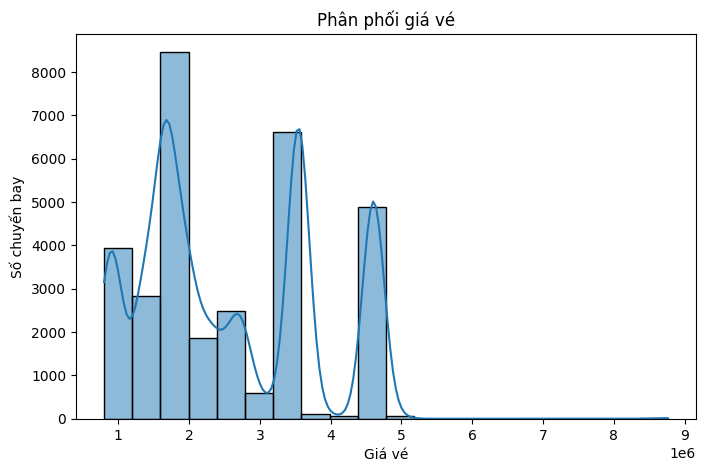

In [113]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['price'], bins=20, kde=True)
plt.title('Phân phối giá vé')
plt.xlabel('Giá vé')
plt.ylabel('Số chuyến bay')
plt.show()


##Biểu đồ phân loại theo hãng bay

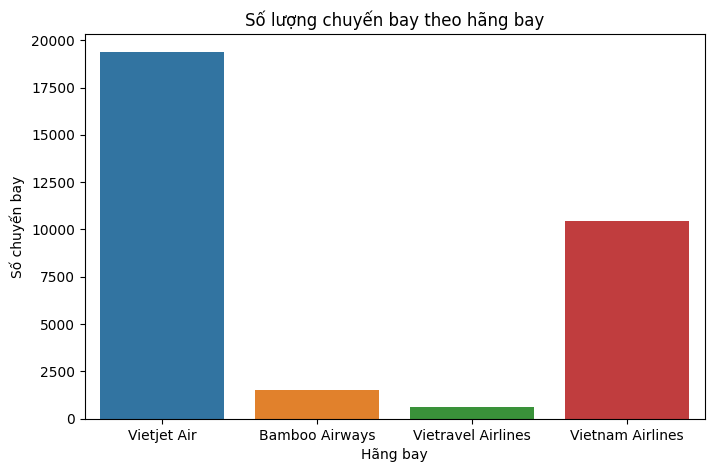

In [114]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airlines-name', data=final_df)
plt.title('Số lượng chuyến bay theo hãng bay')
plt.xlabel('Hãng bay')
plt.ylabel('Số chuyến bay')
plt.show()

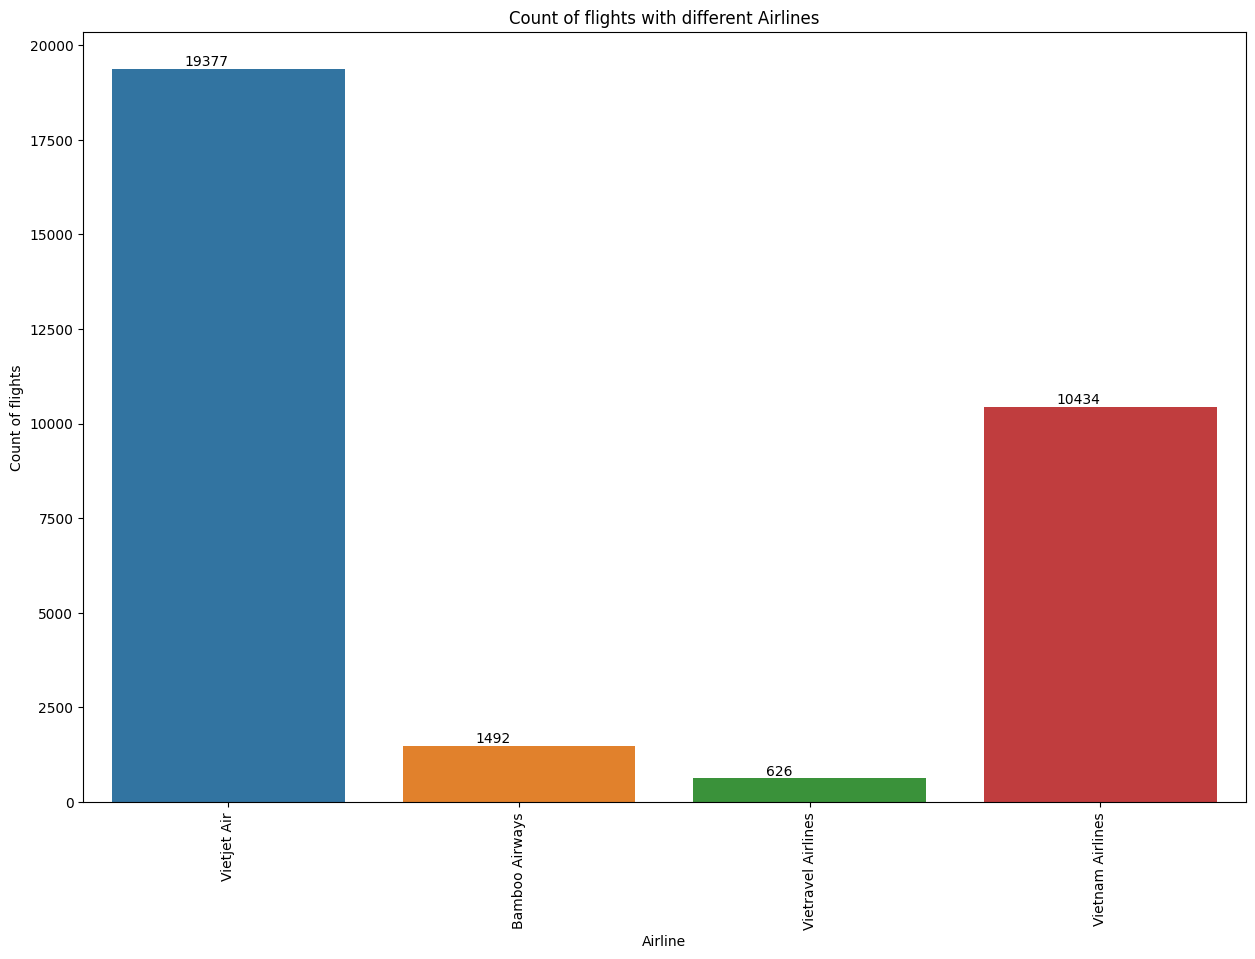

In [115]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airlines-name', data =df_vsl)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

##Biểu đồ tương quan giữa giờ khởi hành và giá vé

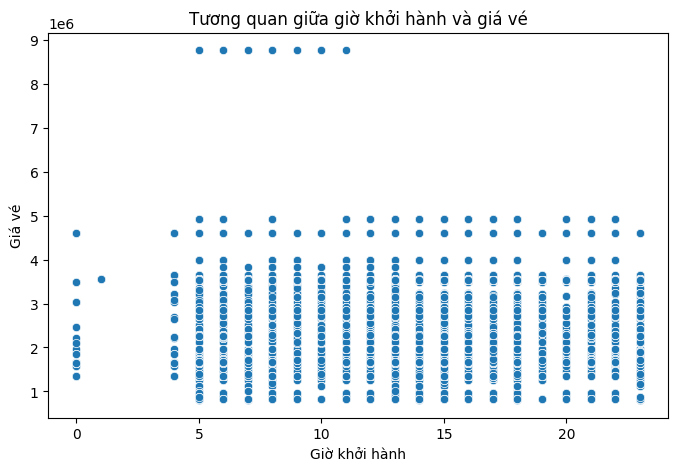

In [116]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dep_hour', y='price', data=final_df)
plt.title('Tương quan giữa giờ khởi hành và giá vé')
plt.xlabel('Giờ khởi hành')
plt.ylabel('Giá vé')
plt.show()

##Biểu đồ tương quan giữa thời gian bay và giá vé

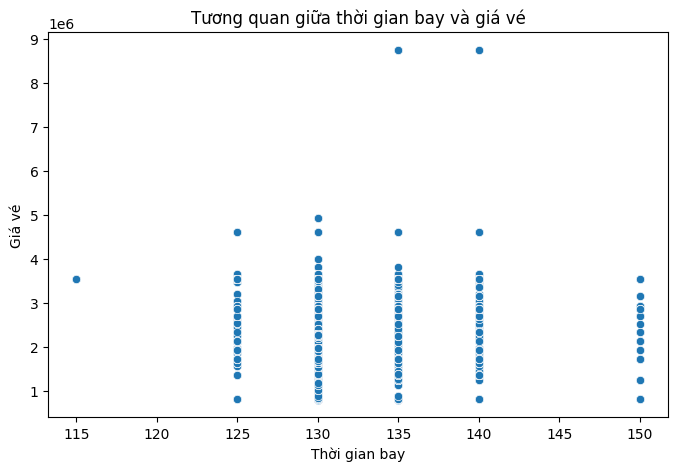

In [117]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='flight-time', y='price', data=final_df)
plt.title('Tương quan giữa thời gian bay và giá vé')
plt.xlabel('Thời gian bay')
plt.ylabel('Giá vé')
plt.show()

##Biểu đồ cột về số chuyến bay theo tháng hoặc năm

In [118]:
df_vsl = final_df.copy()

In [119]:
# Chuyển đổi cột 'Dep_Date' thành kiểu datetime
df_vsl['Dep_Date'] = pd.to_datetime(df_vsl['Dep_Date'])
df_vsl['Dep_Month'] = df_vsl['Dep_Date'].dt.month
df_vsl['Dep_Year'] = df_vsl['Dep_Date'].dt.year

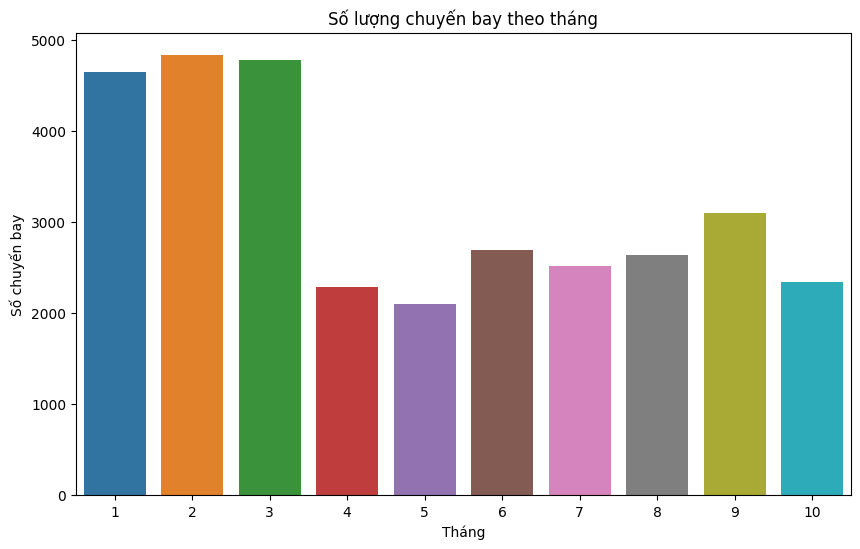

In [120]:
# Biểu đồ cột theo tháng
plt.figure(figsize=(10, 6))
sns.countplot(x='Dep_Month', data=final_df)
plt.title('Số lượng chuyến bay theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số chuyến bay')
plt.show()


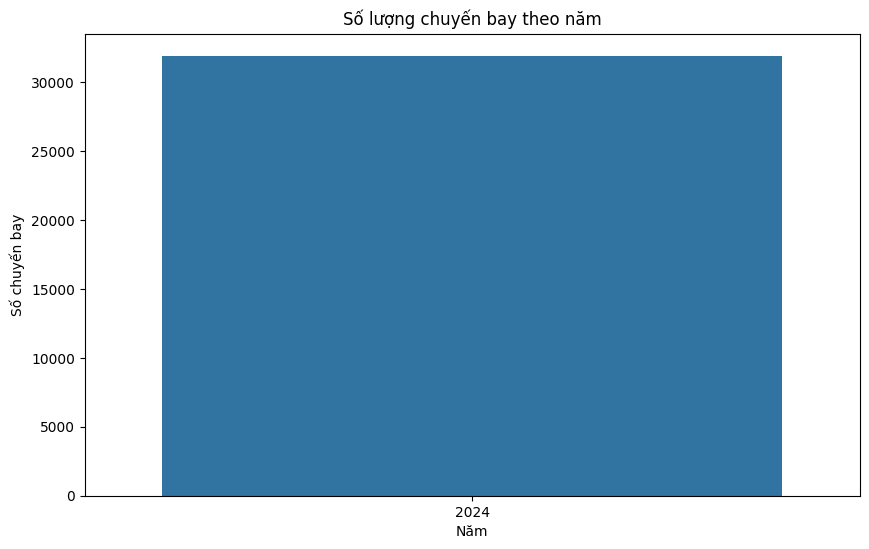

In [121]:
# Biểu đồ cột theo năm
plt.figure(figsize=(10, 6))
sns.countplot(x='Dep_Year', data=final_df)
plt.title('Số lượng chuyến bay theo năm')
plt.xlabel('Năm')
plt.ylabel('Số chuyến bay')
plt.show()

##Biểu đồ phân loại theo hạng vé

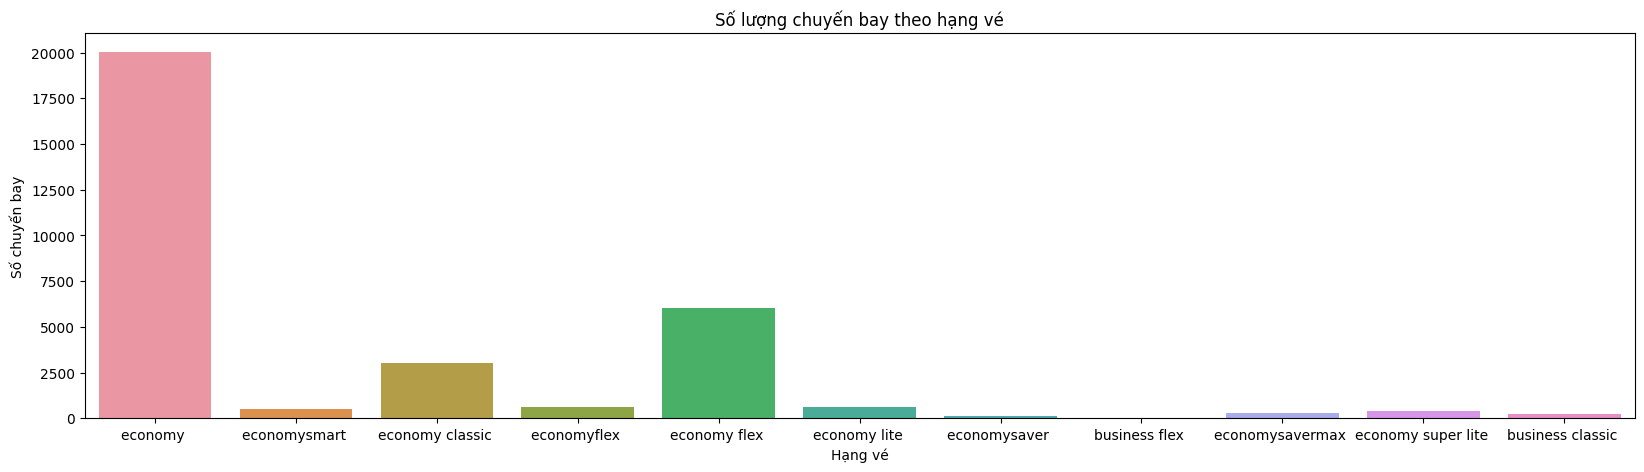

In [122]:
plt.figure(figsize=(20, 5))
sns.countplot(x='rank-seat-class', data=df_vsl)
plt.title('Số lượng chuyến bay theo hạng vé')
plt.xlabel('Hạng vé')
plt.ylabel('Số chuyến bay')
plt.show()

##Biểu đồ số lượng chuyến bay theo điểm dừng

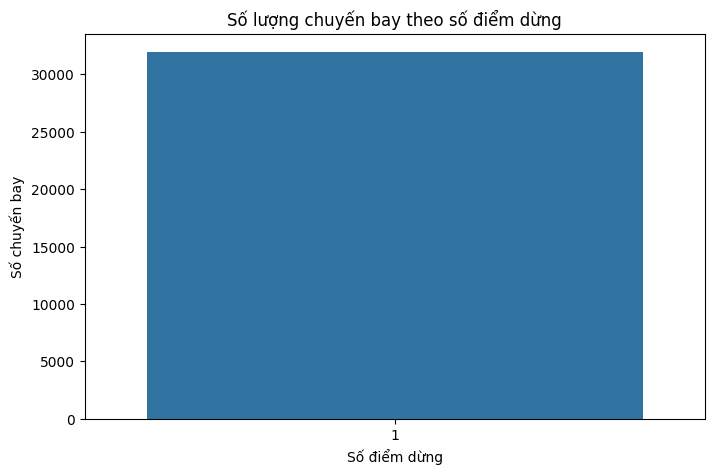

In [123]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Total_Stops', data=df_vsl)
plt.title('Số lượng chuyến bay theo số điểm dừng')
plt.xlabel('Số điểm dừng')
plt.ylabel('Số chuyến bay')
plt.show()

##Biểu đồ phân phối thời gian bay

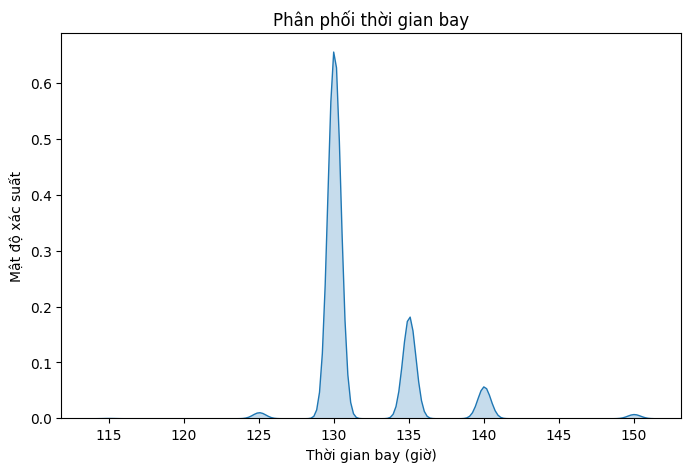

In [124]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_vsl['flight-time'], fill=True)
plt.title('Phân phối thời gian bay')
plt.xlabel('Thời gian bay (giờ)')
plt.ylabel('Mật độ xác suất')
plt.show()

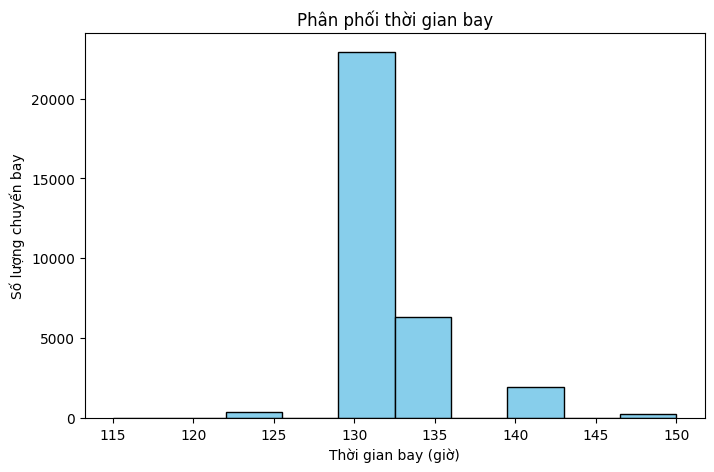

In [125]:
plt.figure(figsize=(8, 5))
plt.hist(df_vsl['flight-time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân phối thời gian bay')
plt.xlabel('Thời gian bay (giờ)')
plt.ylabel('Số lượng chuyến bay')
plt.show()

##Biểu đồ tương quan giữa số hành khách và giá vé

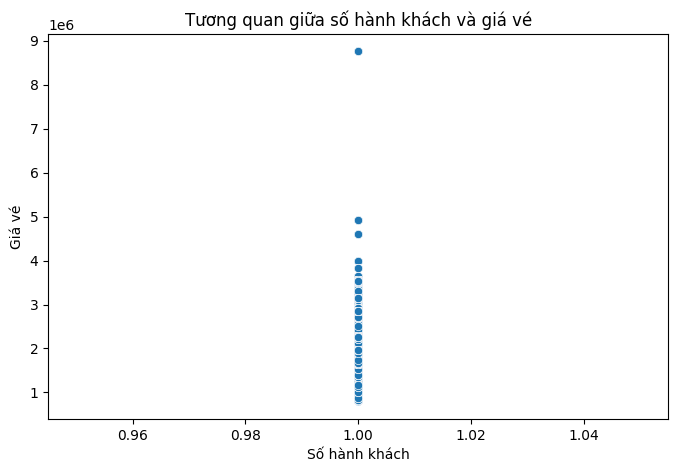

In [126]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total_Passenger', y='price', data=df_vsl)
plt.title('Tương quan giữa số hành khách và giá vé')
plt.xlabel('Số hành khách')
plt.ylabel('Giá vé')
plt.show()

In [127]:
import plotly.express as px

In [128]:
pivot_table = df_vsl.pivot_table(index='Dep_hour', columns='Arr_hour', values='Total_Passenger', aggfunc='sum')

# Vẽ biểu đồ heatmap sử dụng Plotly
fig = px.imshow(pivot_table, x=pivot_table.columns, y=pivot_table.index, color_continuous_scale='Viridis')
fig.update_layout(title='Heatmap Giờ Khởi Hành vs Giờ Đến Nơi')
fig.update_xaxes(title_text='Giờ Đến Nơi')
fig.update_yaxes(title_text='Giờ Khởi Hành')
fig.show()

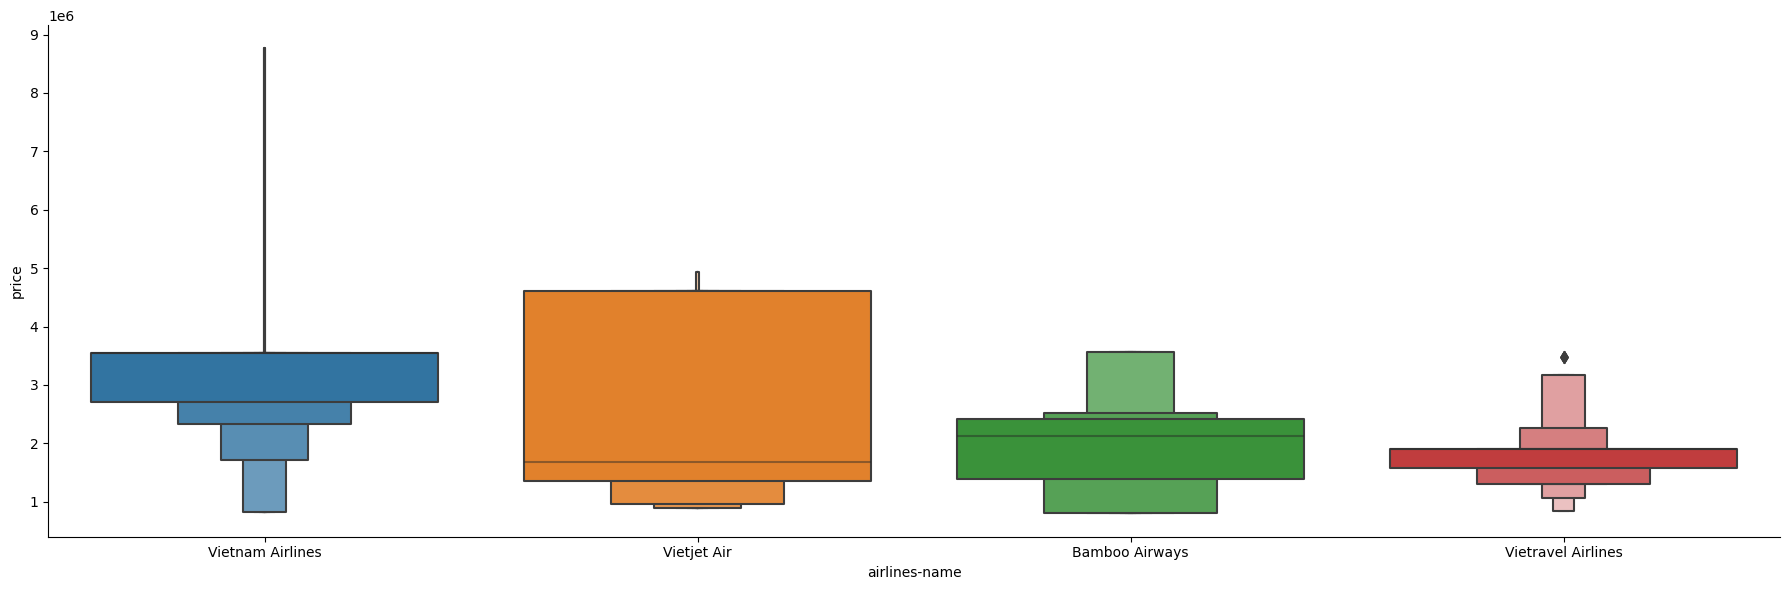

In [129]:
sns.catplot(y="price",x = "airlines-name", data = df_vsl.sort_values('price',ascending=False),kind="boxen", height=6,aspect=3)
plt.show()

##Backend Player


In [130]:
# from flask import Flask, render_template
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# from matplotlib.figure import Figure
# import io

# app = Flask(__name__)


In [131]:
# # Tạo pivot table cho giờ khởi hành và giờ đến nơi
# pivot_table = df_vsl.pivot_table(index='Dep_hour', columns='Arr_hour', values='Total_Passenger', aggfunc='sum')

# # Tạo biểu đồ heatmap sử dụng Matplotlib
# fig = Figure()
# axis = fig.add_subplot(1, 1, 1)
# cax = axis.imshow(pivot_table, cmap='viridis')
# fig.colorbar(cax)

# # Lưu hình ảnh và hiển thị trang web
# @app.route('/')
# def home():
#     output = io.BytesIO()
#     FigureCanvas(fig).print_png(output)
#     return render_template('index.html', img_data=output.getvalue().encode('base64'))

# if __name__ == '__main__':
#     app.run(debug=True)

#

#Exploratory Data Analysis

##Descriptive statistics

###Central tendency

In [132]:
final_df.describe()

price      Dep_hour       Dep_min      Arr_hour       Arr_min  \
count  3.192900e+04  31929.000000  31929.000000  31929.000000  31929.000000   
mean   2.563721e+06     13.925679     23.271634     13.753829     23.276019   
std    1.233433e+06      5.180247     20.720920      6.235700     17.824012   
min    8.000000e+05      0.000000      0.000000      0.000000      0.000000   
25%    1.635500e+06     10.000000      0.000000     10.000000     10.000000   
50%    2.207000e+06     13.000000     25.000000     16.000000     15.000000   
75%    3.546000e+06     18.000000     45.000000     18.000000     40.000000   
max    8.762000e+06     23.000000     55.000000     23.000000     55.000000   

           Dep_Date     Dep_Month  Dep_Year      Arr_Date     Arr_Month  \
count  31929.000000  31929.000000   31929.0  31929.000000  31929.000000   
mean      15.627361      4.837514    2024.0     15.648940      4.840051   
std        8.549102      2.976969       0.0      8.558943      2.976902   
min        1.000000      1.000000    2024.0      1.000000      1.000000   
25%        8.000000      2.000000    2024.0      8.000000      2.000000   
50%       16.000000      4.000000    2024.0     16.000000      4.000000   
75%       23.000000      8.000000    2024.0     23.000000      8.000000   
max       31.000000     10.000000    2024.0     31.000000     10.000000   

       Arr_Year   flight-time  cabin-baggage(kg)  checked-baggage(kg)  \
count   31929.0  31929.000000       31929.000000         31929.000000   
mean     2024.0    131.713489           9.058129            16.244605   
std         0.0      3.449464           2.380442            11.478322   
min      2024.0    115.000000           7.000000             0.000000   
25%      2024.0    130.000000           7.000000             0.000000   
50%      2024.0    130.000000           7.000000            20.000000   
75%      2024.0    135.000000          12.000000            23.000000   
max      2024.0    150.000000          18.000000            32.000000   

       Total_Stops  Total_Passenger  
count      31929.0          31929.0  
mean           1.0              1.0  
std            0.0              0.0  
min            1.0              1.0  
25%            1.0              1.0  
50%            1.0              1.0  
75%            1.0              1.0  
max            1.0              1.0

In [133]:
final_df.var()

<ipython-input-133-09582bee579a>:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



price                  1.521356e+12
Dep_hour               2.683496e+01
Dep_min                4.293565e+02
Arr_hour               3.888396e+01
Arr_min                3.176954e+02
Dep_Date               7.308714e+01
Dep_Month              8.862347e+00
Dep_Year               0.000000e+00
Arr_Date               7.325551e+01
Arr_Month              8.861944e+00
Arr_Year               0.000000e+00
flight-time            1.189880e+01
cabin-baggage(kg)      5.666503e+00
checked-baggage(kg)    1.317519e+02
Total_Stops            0.000000e+00
Total_Passenger        0.000000e+00
dtype: float64

###Dispersion

In [185]:
percentiles = [0.25,0.50, 0.75]
price_percentiles = final_df['price'].quantile(q=percentiles)
print(f'Percentiles of Price (Q1, Median, Q3): {price_percentiles.values}')


Percentiles of Price (Q1, Median, Q3): [1635500. 2207000. 3546000.]


In [135]:
data_range = final_df['price'].max() - final_df['price'].min()
print(f'Range of Price: {data_range:.2f}')


Range of Price: 7962000.00


In [136]:
q1 = final_df['price'].quantile(0.25)
q2 = final_df['price'].quantile(0.50)
q3 = final_df['price'].quantile(0.75)

iqr = q3 - q1

print(f'Q1: {q1:.2f}')
print(f'Median (Q2): {q2:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {iqr:.2f}')


Q1: 1635500.00
Median (Q2): 2207000.00
Q3: 3546000.00
IQR: 1910500.00


In [137]:
variance_price = final_df['price'].var()
std_dev_price = final_df['price'].std()

print(f'Variance of Price: {variance_price:.2f}')
print(f'Standard Deviation of Price: {std_dev_price:.2f}')


Variance of Price: 1521355819407.01
Standard Deviation of Price: 1233432.54


In [138]:
mean_price = final_df['price'].mean()
coefficient_of_variation = (std_dev_price / mean_price) * 100

print(f'Coefficient of Variation: {coefficient_of_variation:.2f}%')


Coefficient of Variation: 48.11%


Skewness

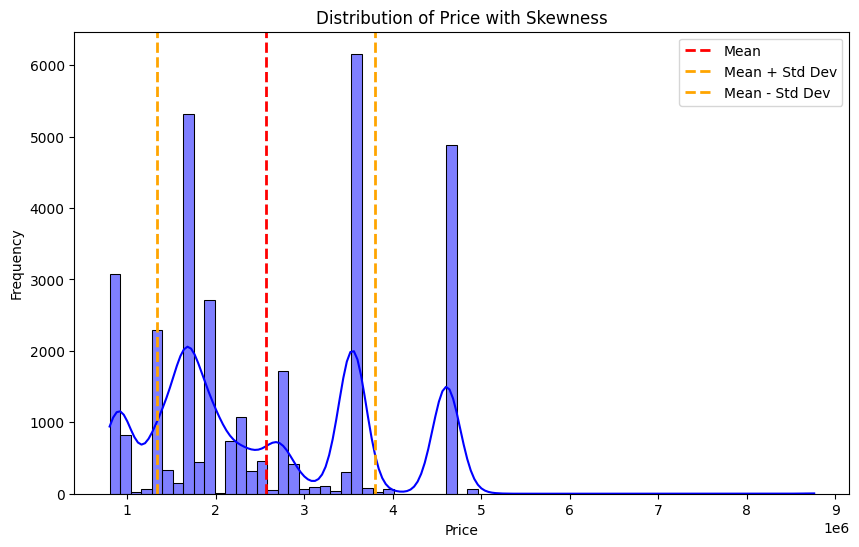

In [139]:
# Trực quan hóa histogram và kernel density plot của biến 'price' với thông tin độ lệch
plt.figure(figsize=(10, 6))
sns.histplot(final_df['price'], kde=True, color='blue')
plt.title('Distribution of Price with Skewness')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Thêm thông tin độ lệch
plt.axvline(final_df['price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(final_df['price'].mean() + final_df['price'].std(), color='orange', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(final_df['price'].mean() - final_df['price'].std(), color='orange', linestyle='dashed', linewidth=2, label='Mean - Std Dev')

plt.legend()
plt.show()


In [140]:
from scipy.stats import skew

# Tính độ lệch của biến 'price'
price_skewness = skew(final_df['price'])

# Hiển thị thông tin về độ lệch
print(f'Skewness of Price: {price_skewness:.2f}')

# Xác định hướng lệch
if price_skewness > 0:
    print('Dữ liệu có xu hướng lệch về phải.')
elif price_skewness < 0:
    print('Dữ liệu có xu hướng lệch về trái.')
else:
    print('Dữ liệu là đối xứng.')


Skewness of Price: 0.41
Dữ liệu có xu hướng lệch về phải.


Kurtosis

In [141]:
from scipy.stats import kurtosis

# Tính kurtosis của biến 'price'
price_kurtosis = kurtosis(final_df['price'])

# Hiển thị thông tin về kurtosis
print(f'Kurtosis of Price: {price_kurtosis:.2f}')

# Xác định hình dạng của dữ liệu
if price_kurtosis > 3:
    print('Dữ liệu có đỉnh cao hơn (chói hơn) so với phân phối chuẩn.')
elif price_kurtosis < 3:
    print('Dữ liệu có đỉnh thấp hơn (bẹp hơn) so với phân phối chuẩn.')
else:
    print('Dữ liệu có hình dạng tương tự như phân phối chuẩn.')


Kurtosis of Price: -0.94
Dữ liệu có đỉnh thấp hơn (bẹp hơn) so với phân phối chuẩn.


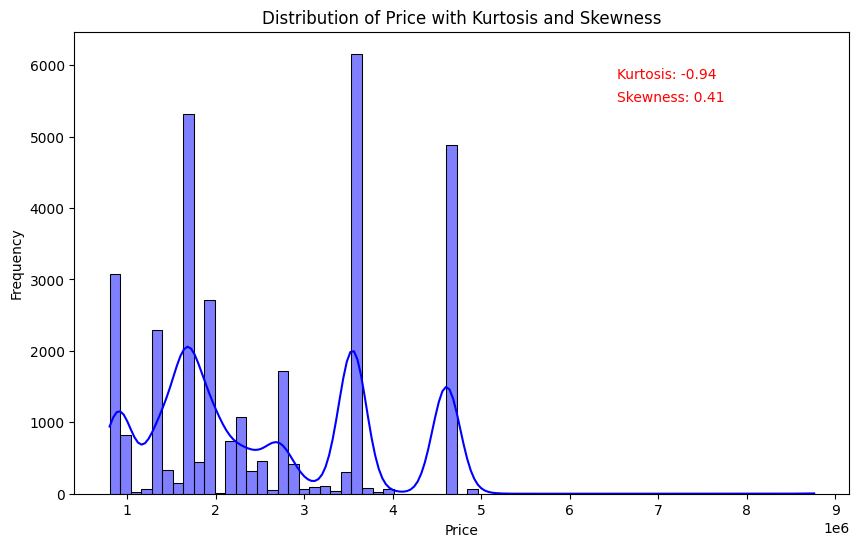

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Tính kurtosis và skewness của biến 'price'
price_kurtosis = kurtosis(df['price'])
price_skewness = skew(df['price'])

# Trực quan hóa histogram và kernel density plot của biến 'price'
plt.figure(figsize=(10, 6))
sns.histplot(final_df['price'], kde=True, color='blue')
plt.title('Distribution of Price with Kurtosis and Skewness')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Thêm thông tin kurtosis và skewness
plt.annotate(f'Kurtosis: {price_kurtosis:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', color='red')
plt.annotate(f'Skewness: {price_skewness:.2f}', xy=(0.7, 0.85), xycoords='axes fraction', color='red')

plt.show()


Correlation

In [143]:
import pandas as pd

# Lấy ma trận tương quan của tất cả các biến số định lượng
correlation_matrix = df.corr()

# In ma trận tương quan
print(correlation_matrix)


                        price  flight-time  Dep_hour   Dep_min  Arr_hour  \
price                1.000000     0.141544 -0.006364 -0.263971  0.005006   
flight-time          0.141544     1.000000  0.045504 -0.372363 -0.042259   
Dep_hour            -0.006364     0.045504  1.000000  0.204430  0.230583   
Dep_min             -0.263971    -0.372363  0.204430  1.000000  0.064660   
Arr_hour             0.005006    -0.042259  0.230583  0.064660  1.000000   
Arr_min              0.050913    -0.201400  0.160754  0.223412  0.057271   
Dep_Date            -0.059035     0.046160  0.021202 -0.030843 -0.018780   
Dep_Month           -0.093593    -0.177207 -0.035594  0.241312  0.063751   
Dep_Year                  NaN          NaN       NaN       NaN       NaN   
Arr_Date            -0.061011     0.048329  0.025541 -0.031448 -0.023908   
Arr_Month           -0.093482    -0.177192 -0.034270  0.241795  0.061918   
Arr_Year                  NaN          NaN       NaN       NaN       NaN   
cabin-baggag

<ipython-input-143-9324e013cc4a>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



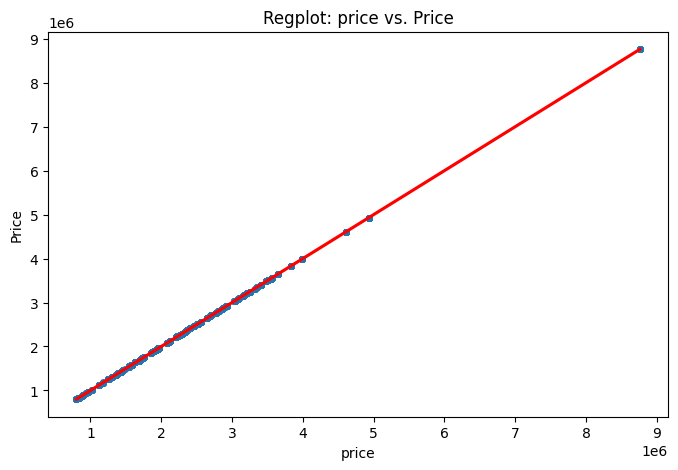

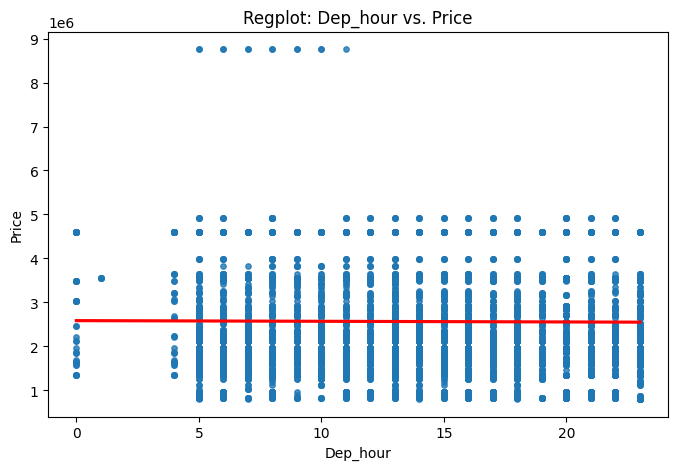

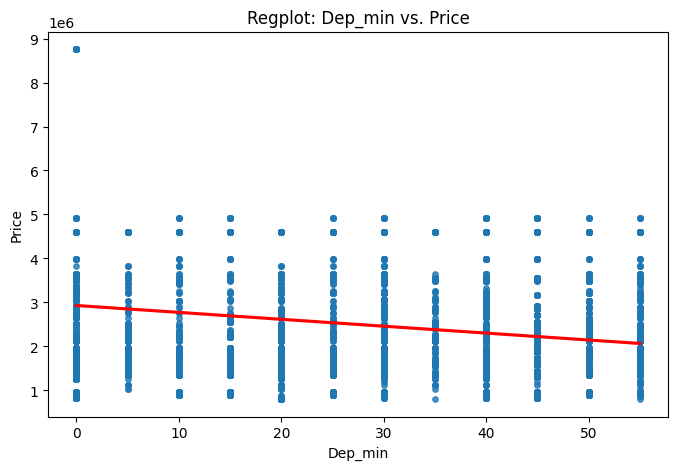

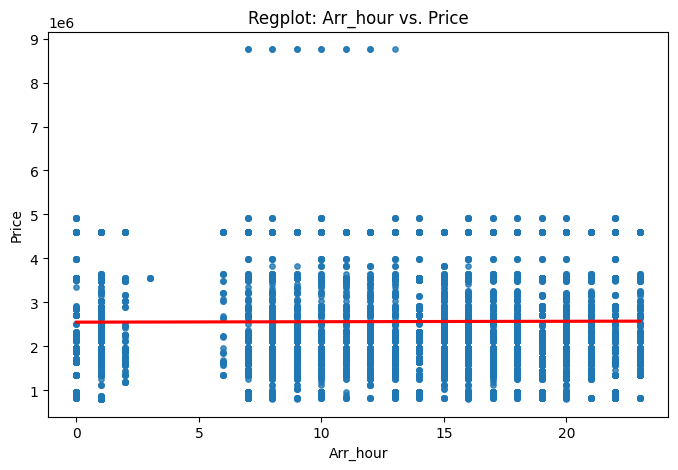

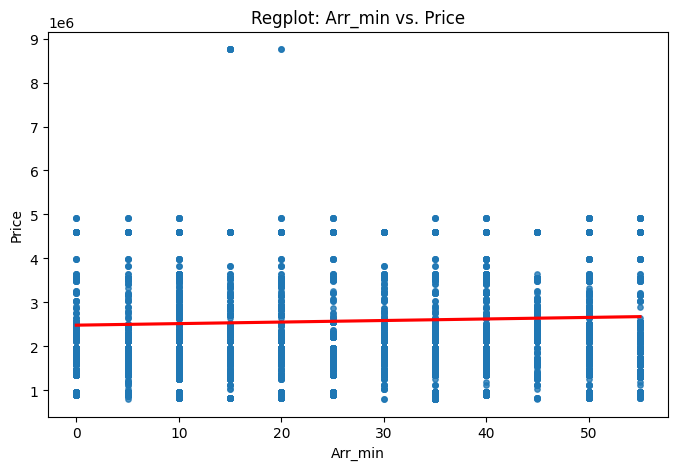

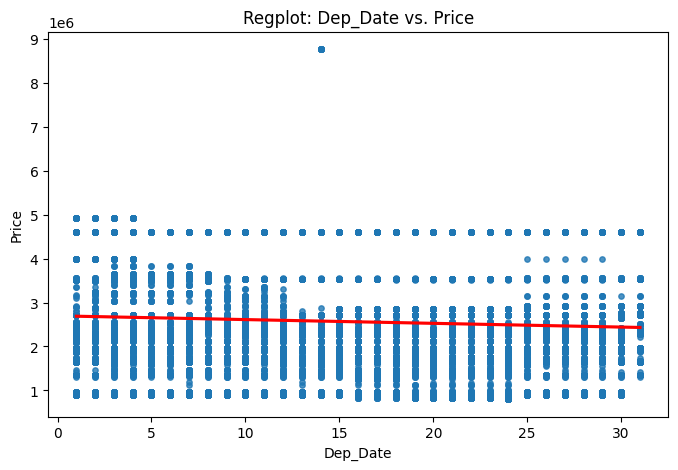

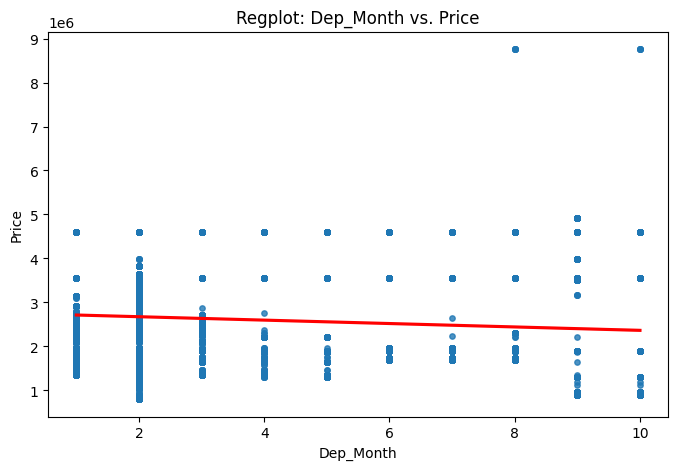

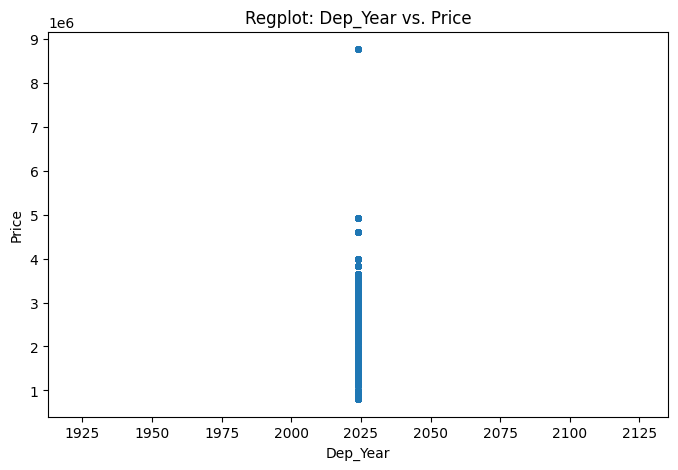

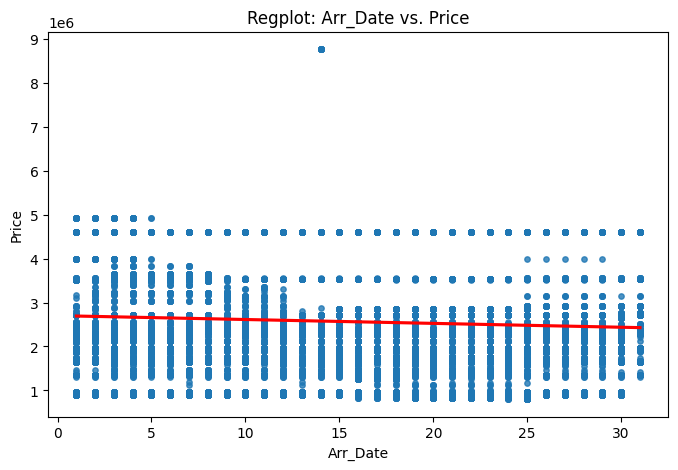

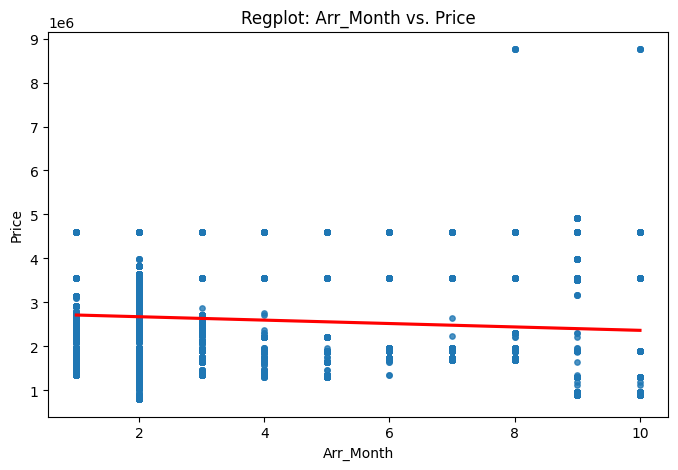

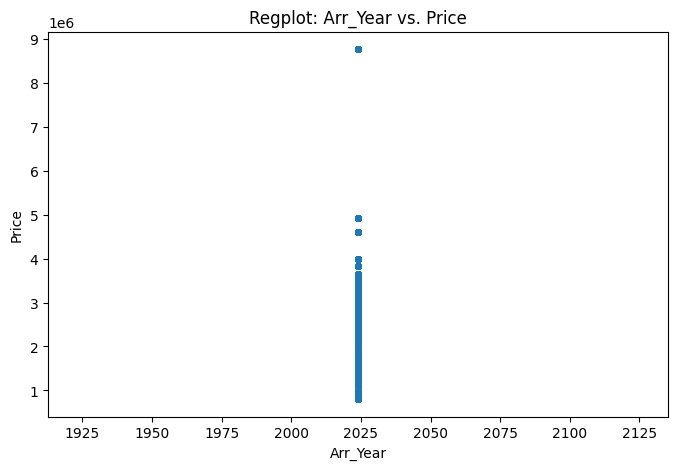

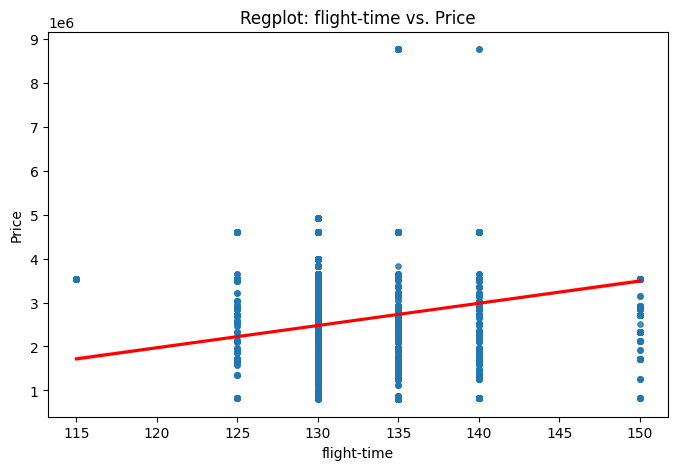

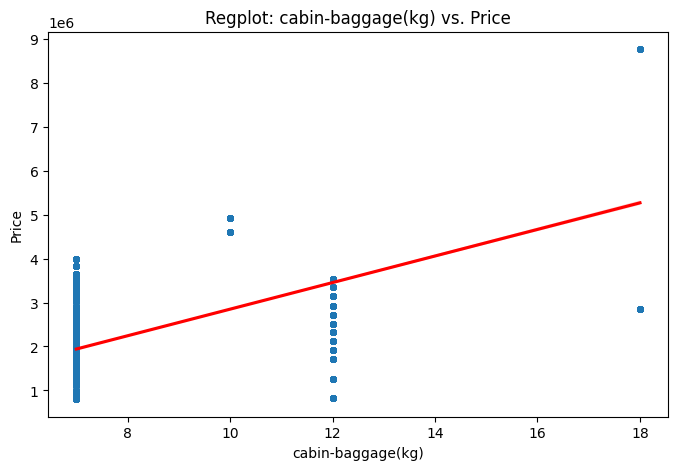

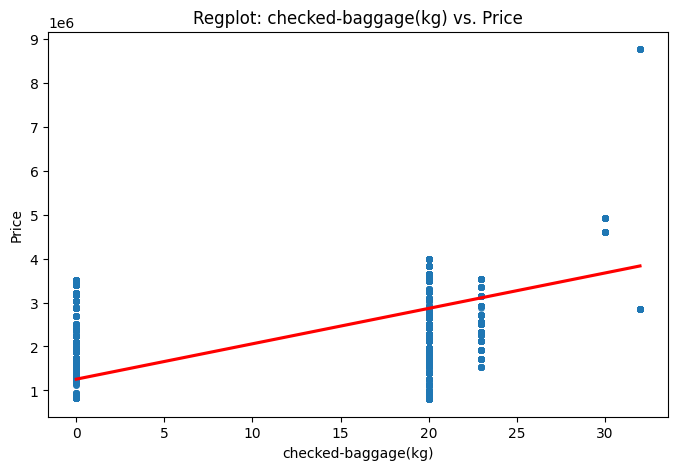

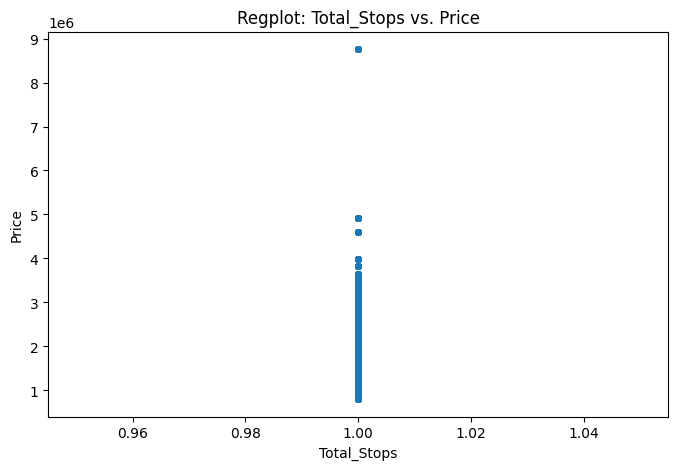

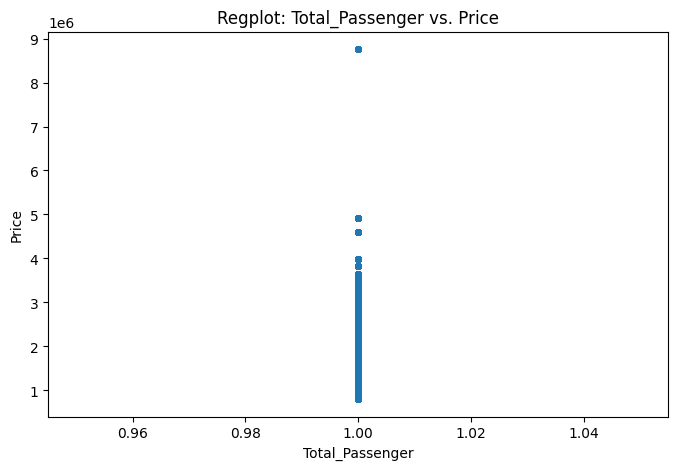

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy danh sách tất cả các biến số định lượng (numerical variables)
numerical_variables = final_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Vẽ regplot cho từng biến số định lượng
for variable in numerical_variables:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=variable, y='price', data=final_df, scatter_kws={'s': 15}, line_kws={'color': 'red'})
    plt.title(f'Regplot: {variable} vs. Price')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()


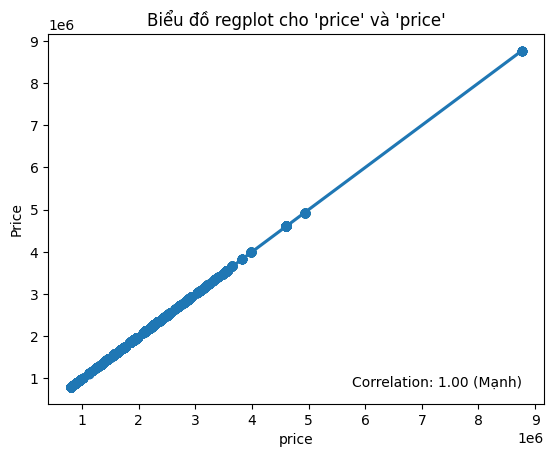

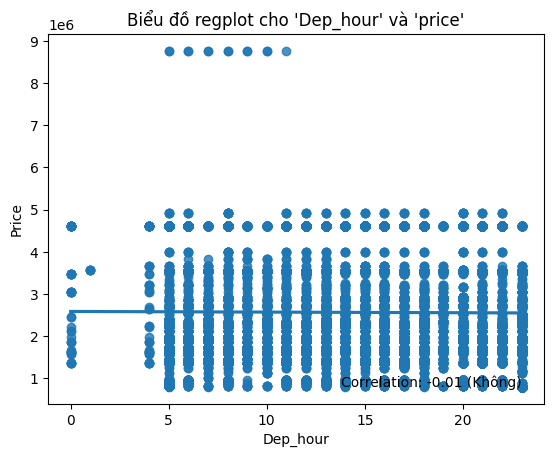

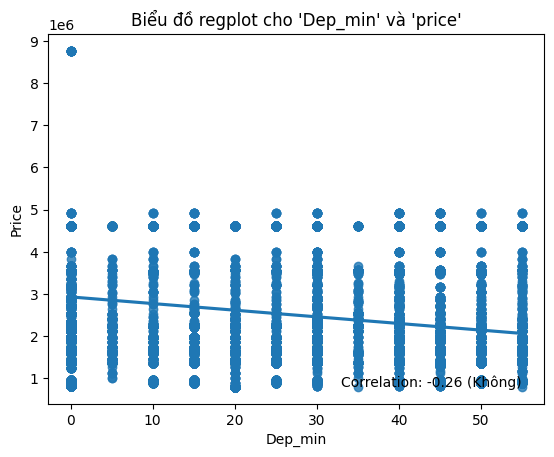

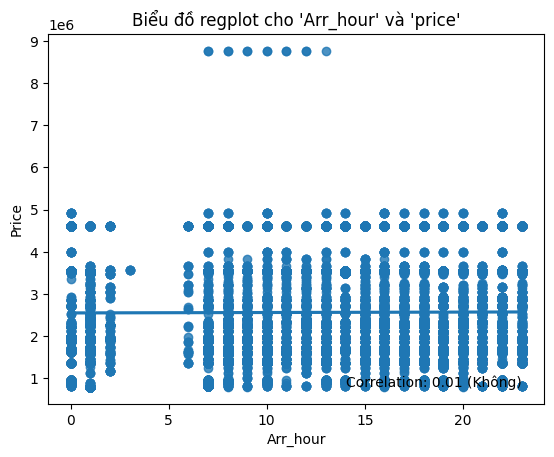

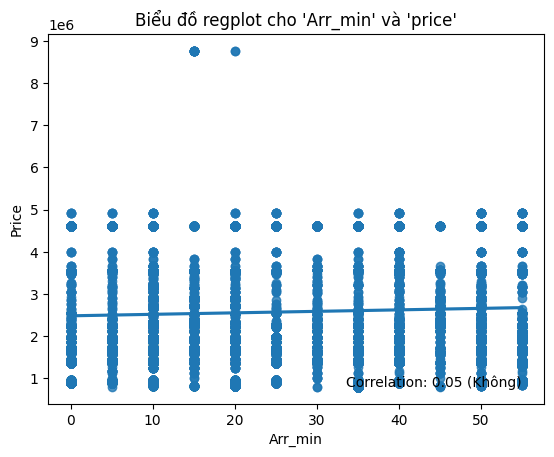

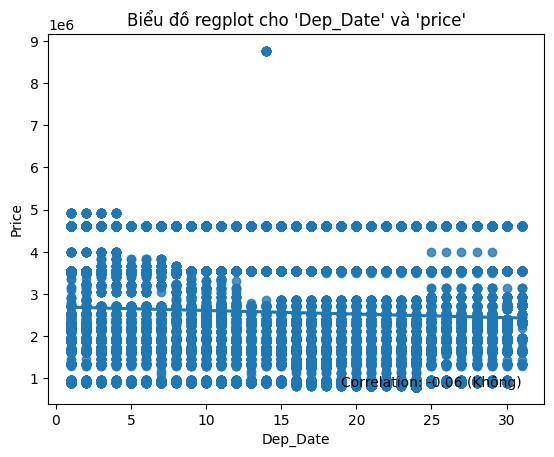

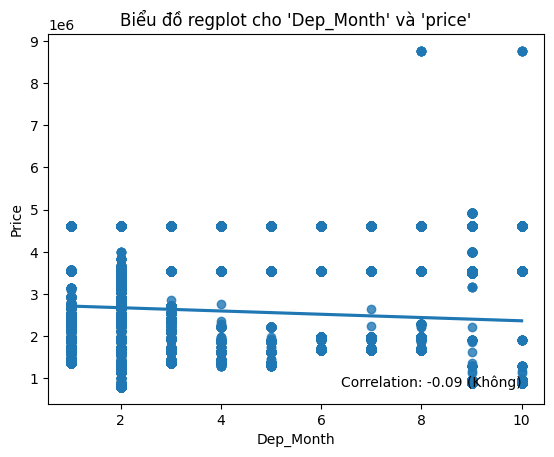

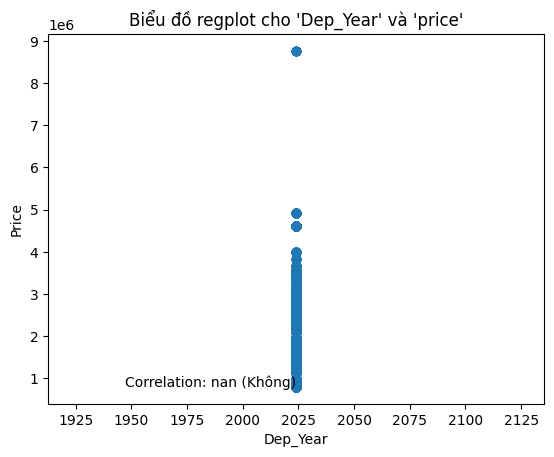

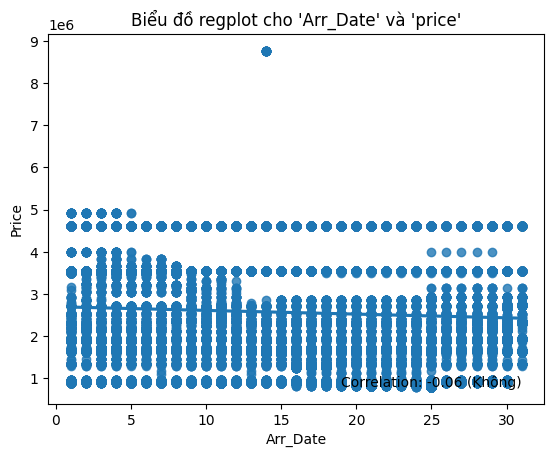

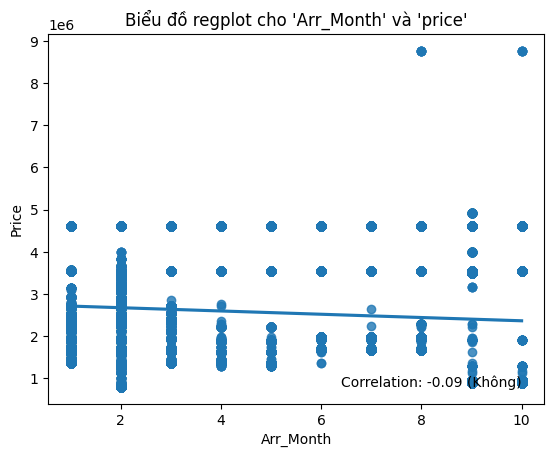

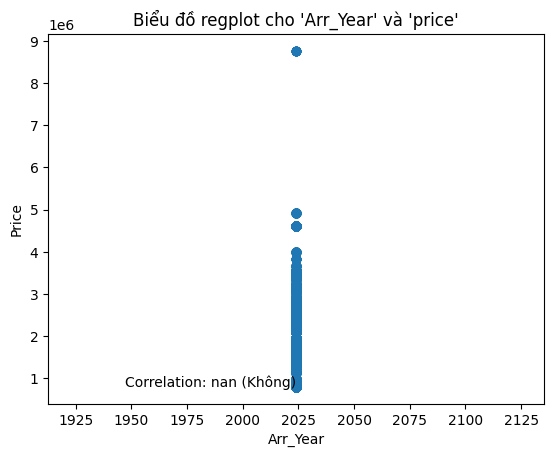

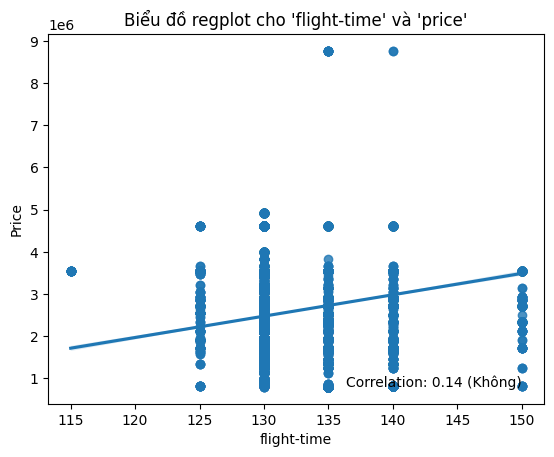

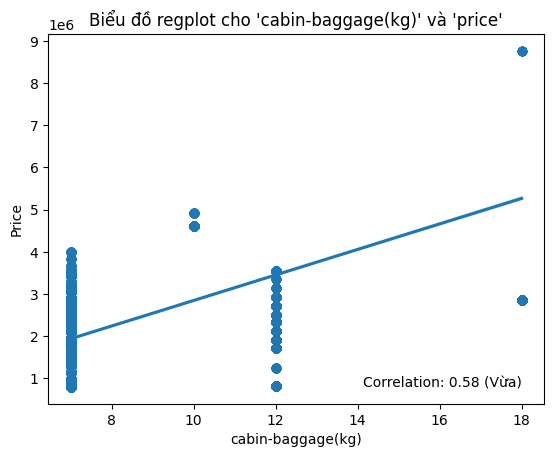

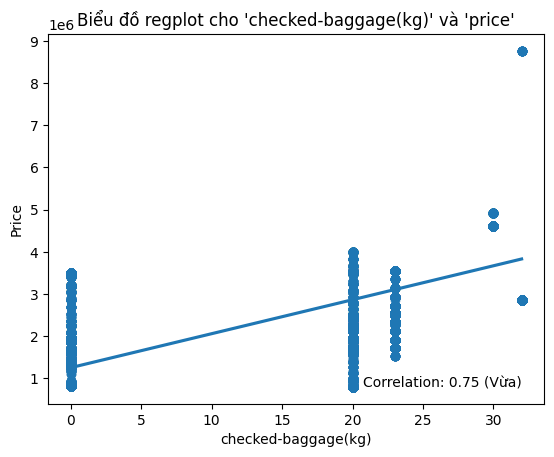

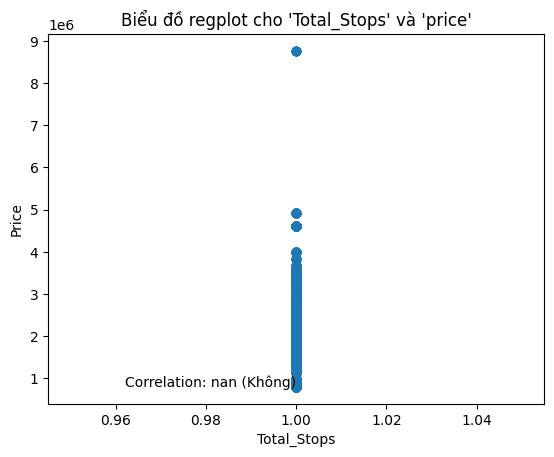

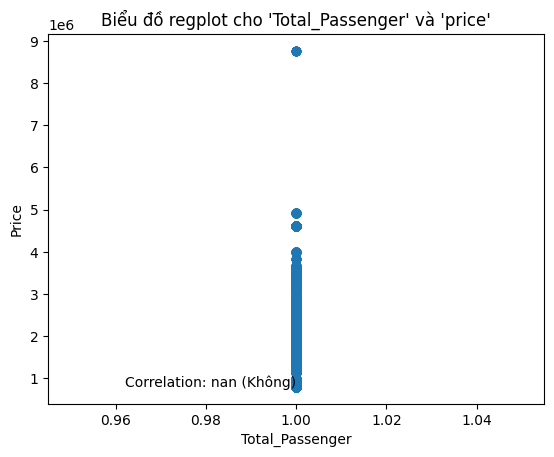

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

attributes = final_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for attribute in attributes:
    sns.regplot(x=attribute, y='price', data=final_df)
    plt.title(f"Biểu đồ regplot cho '{attribute}' và 'price'")
    plt.xlabel(attribute)
    plt.ylabel('Price')
    correlation = final_df[attribute].corr(final_df['price'])

    # Đánh giá mức độ tương quan
    if correlation >= 0.8:
        correlation_level = 'Mạnh'
    elif correlation >= 0.5:
        correlation_level = 'Vừa'
    elif correlation >= 0.3:
        correlation_level = 'Yếu'
    else:
        correlation_level = 'Không'

    plt.text(final_df[attribute].max(), final_df['price'].min(), f'Correlation: {correlation:.2f} ({correlation_level})', ha='right')

    plt.show()

##Tương quan Pearson

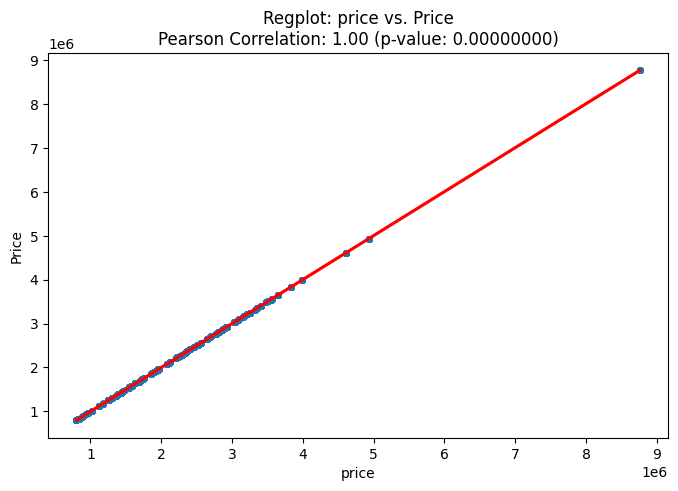

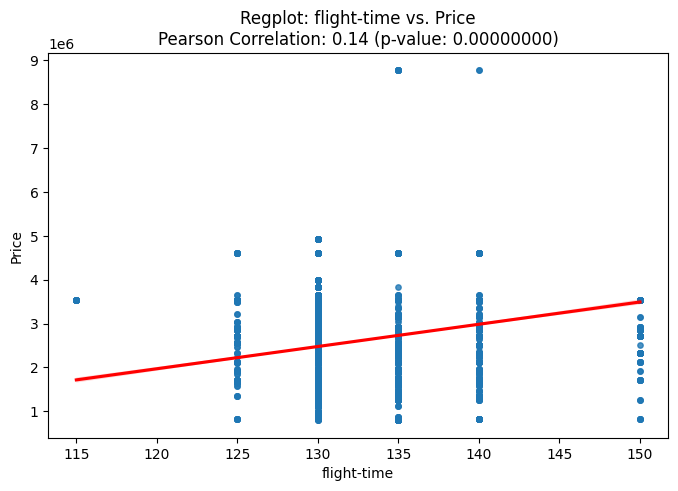

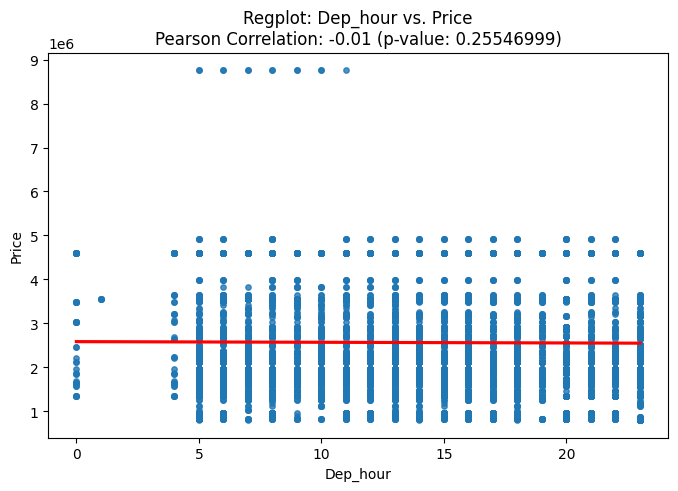

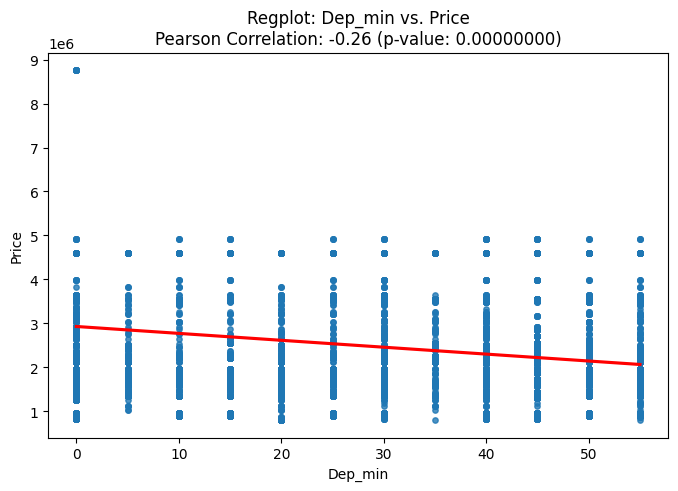

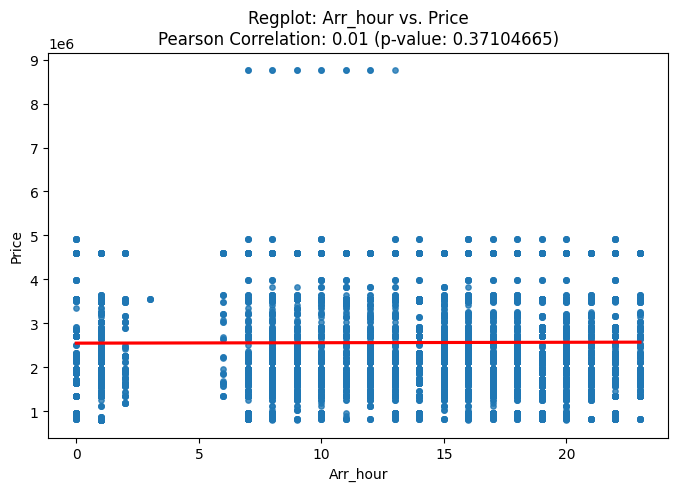

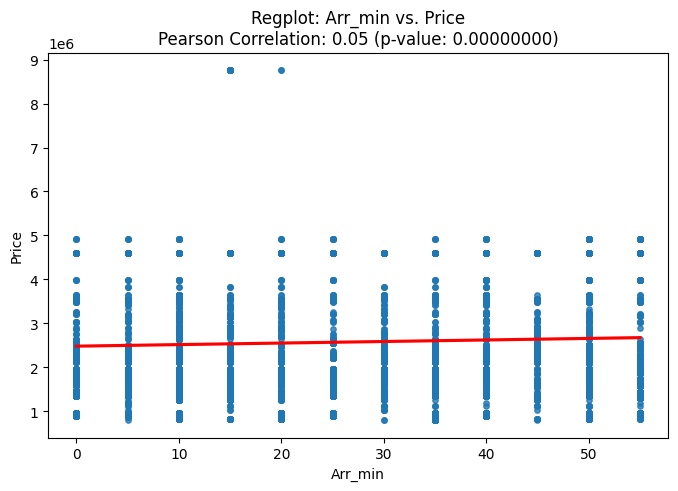

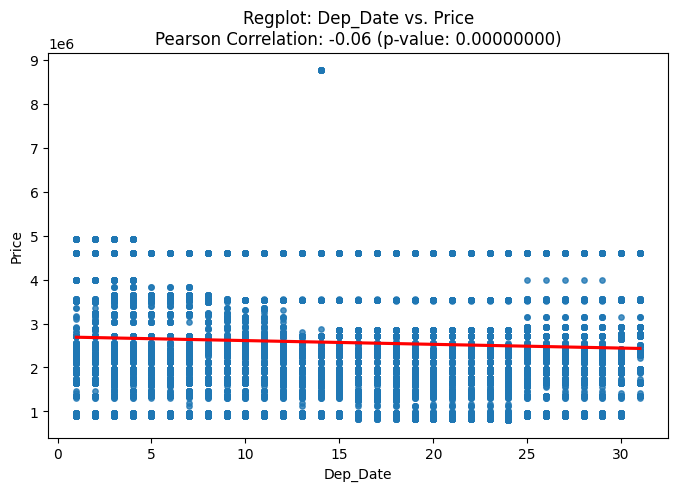

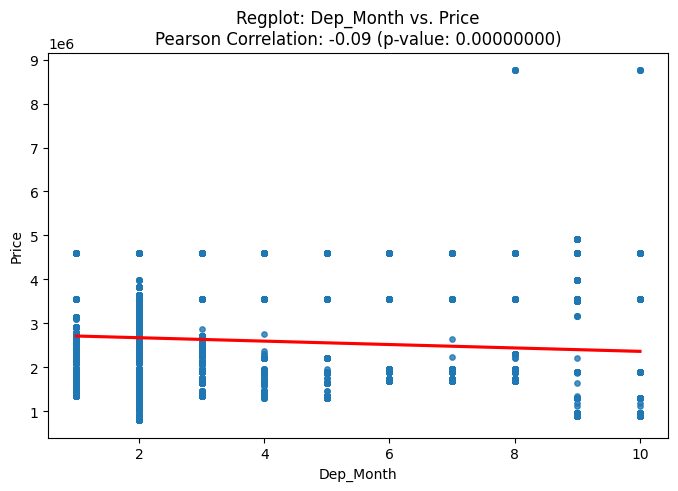

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



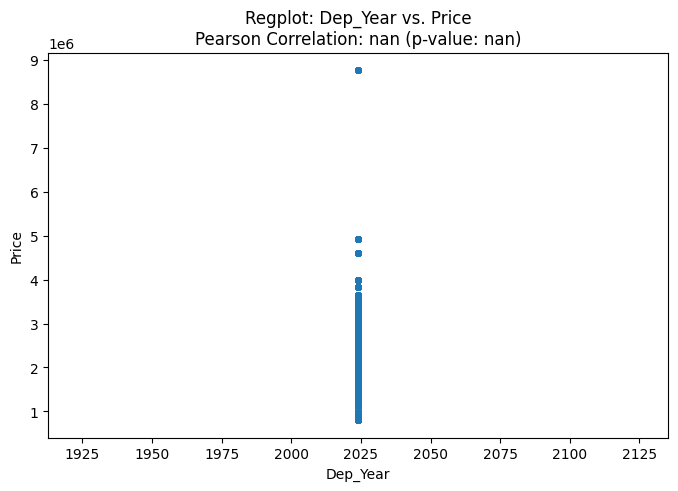

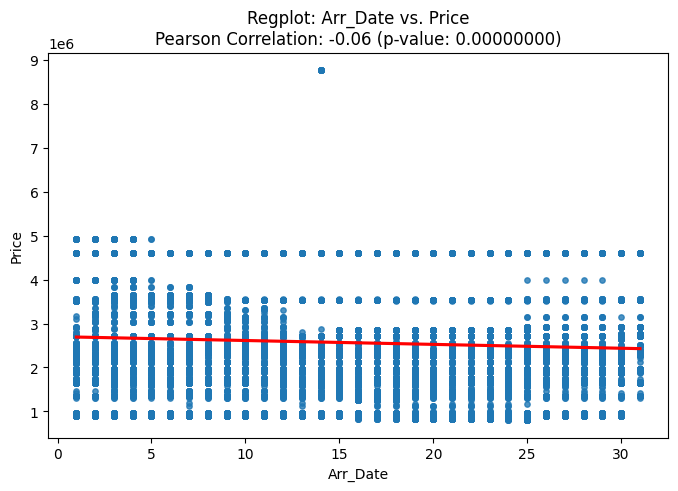

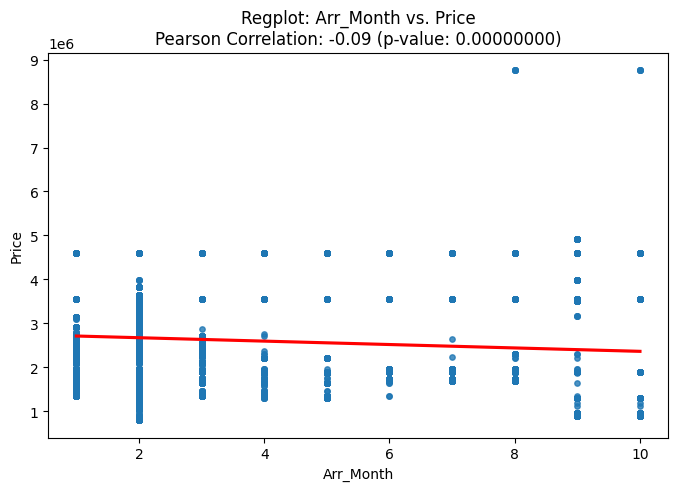

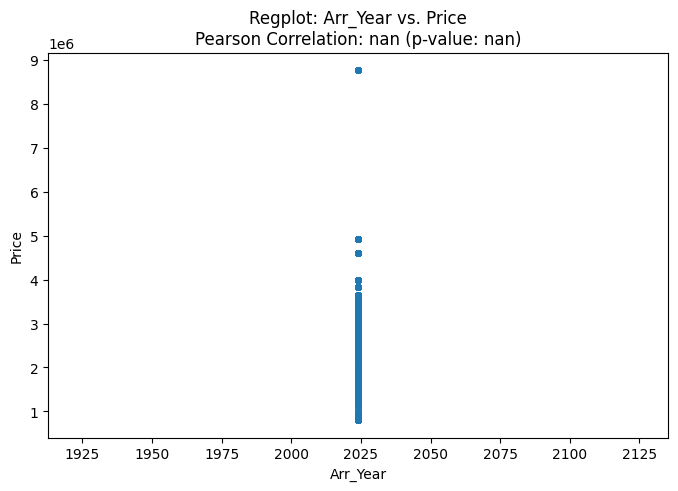

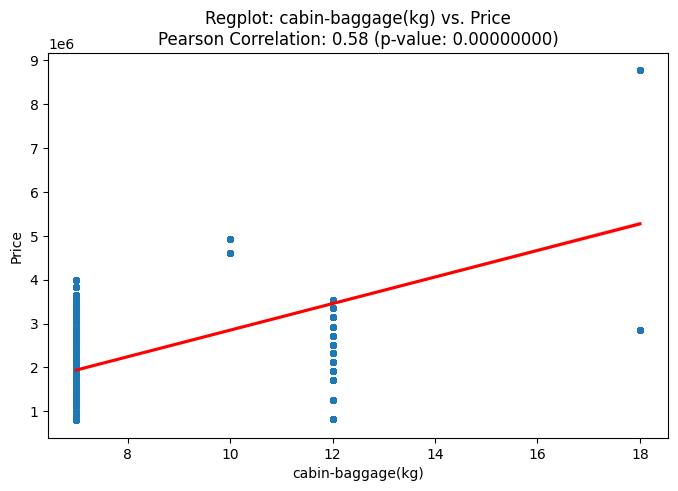

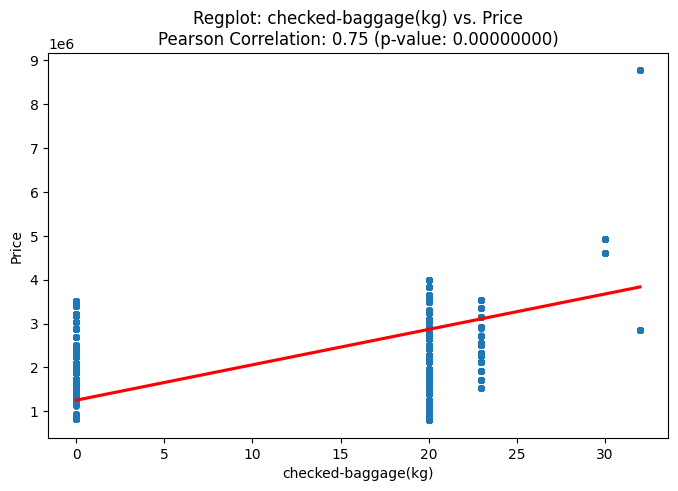

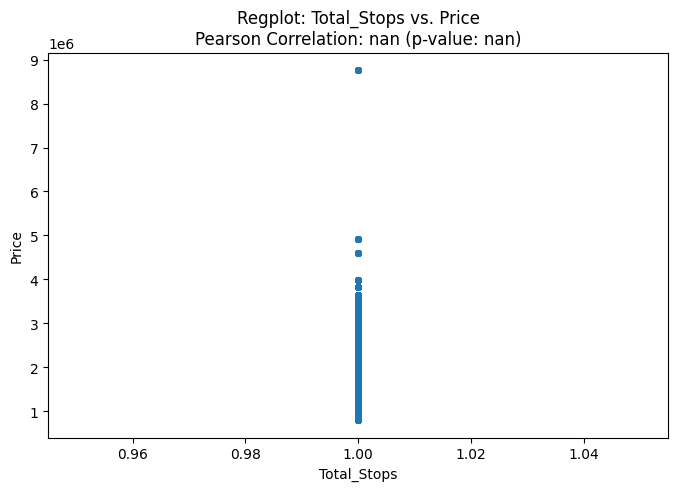

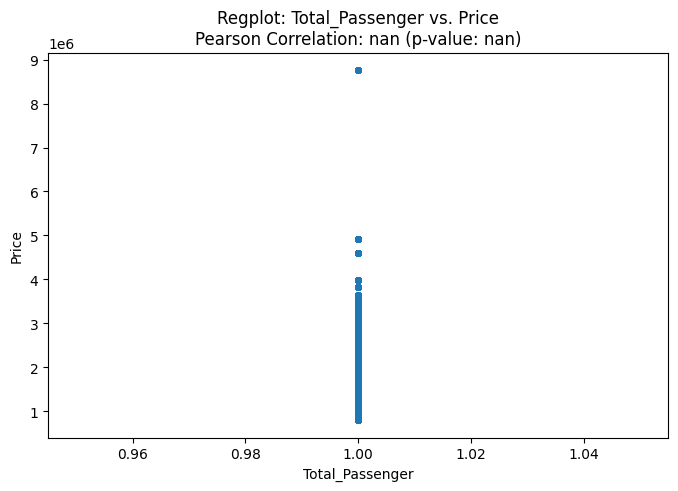

In [146]:
from scipy.stats import pearsonr
import scipy.stats as stats
# Lấy danh sách tất cả các biến số định lượng
numerical_variables = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Vẽ regplot và hiển thị hệ số tương quan Pearson cho từng biến số
for variable in numerical_variables:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=variable, y='price', data=df, scatter_kws={'s': 15}, line_kws={'color': 'red'})

    # Tính toán tương quan Pearson và giá trị p
    correlation_coefficient, p_value = stats.pearsonr(df[variable], df['price'])

    plt.title(f'Regplot: {variable} vs. Price\nPearson Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.8f})')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()


In [147]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   Dep_hour             31929 non-null  int64  
 6   Dep_min              31929 non-null  int64  
 7   Arr_hour             31929 non-null  int64  
 8   Arr_min              31929 non-null  int64  
 9   Dep_Date             31929 non-null  int64  
 10  Dep_Month            31929 non-null  int64  
 11  Dep_Year             31929 non-null  int64  
 12  Arr_Date             31929 non-null  int64  
 13  Arr_Month            31929 non-null  int64  
 14  Arr_Year             31929 non-null  int64  
 15  flight-time          31929 non-null 

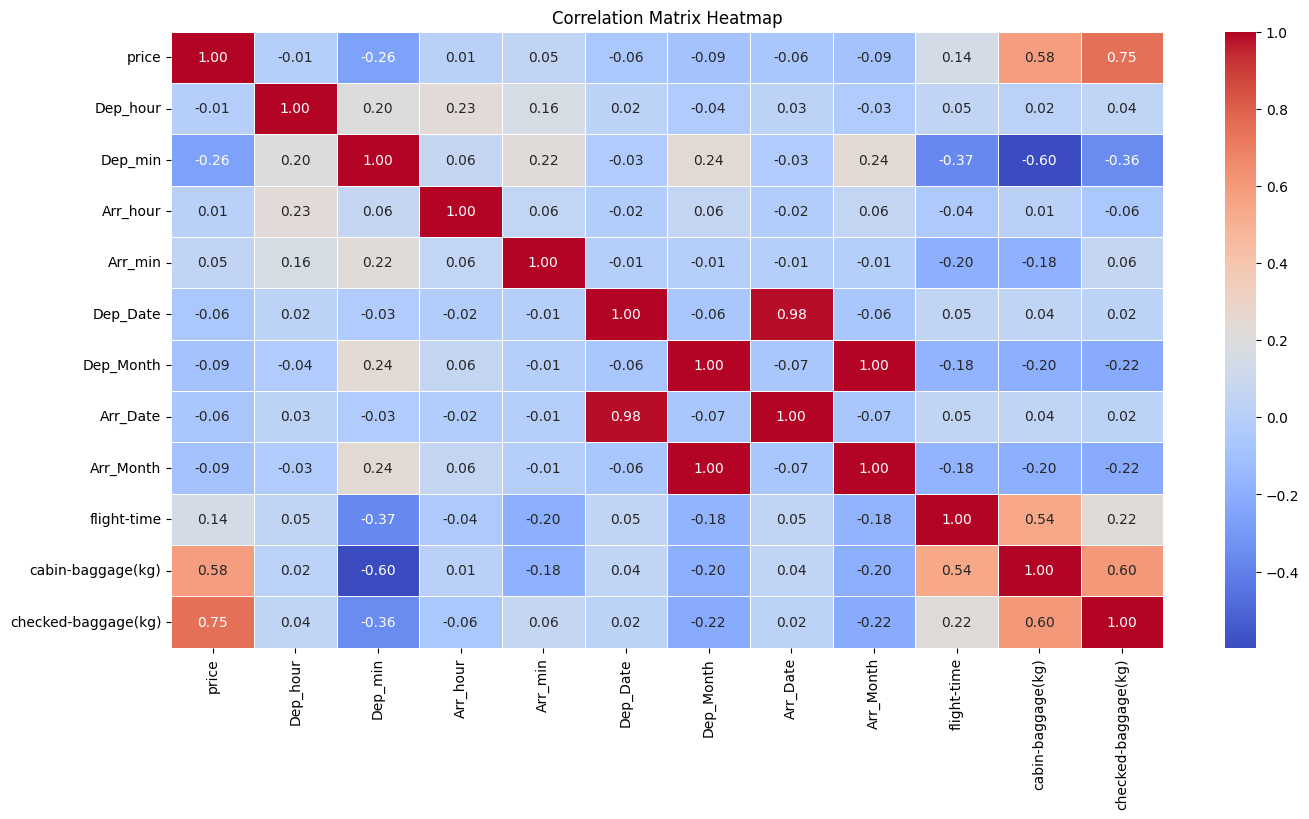

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt



# Chọn các biến số để tính ma trận tương quan
numerical_features = ['price', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Dep_Date', 'Dep_Month', 'Arr_Date', 'Arr_Month', 'flight-time', 'cabin-baggage(kg)', 'checked-baggage(kg)']

# Tính ma trận tương quan
correlation_matrix = final_df[numerical_features].corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


##Phân Phối Giá (Price Distribution)

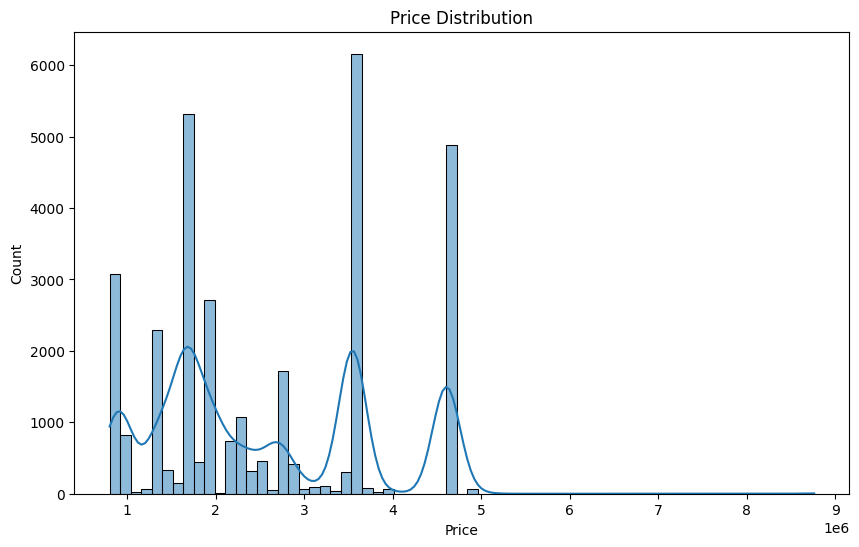

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(final_df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


##Phân Phối của Biến Số Định Lượng (Distribution of Numerical Variables)

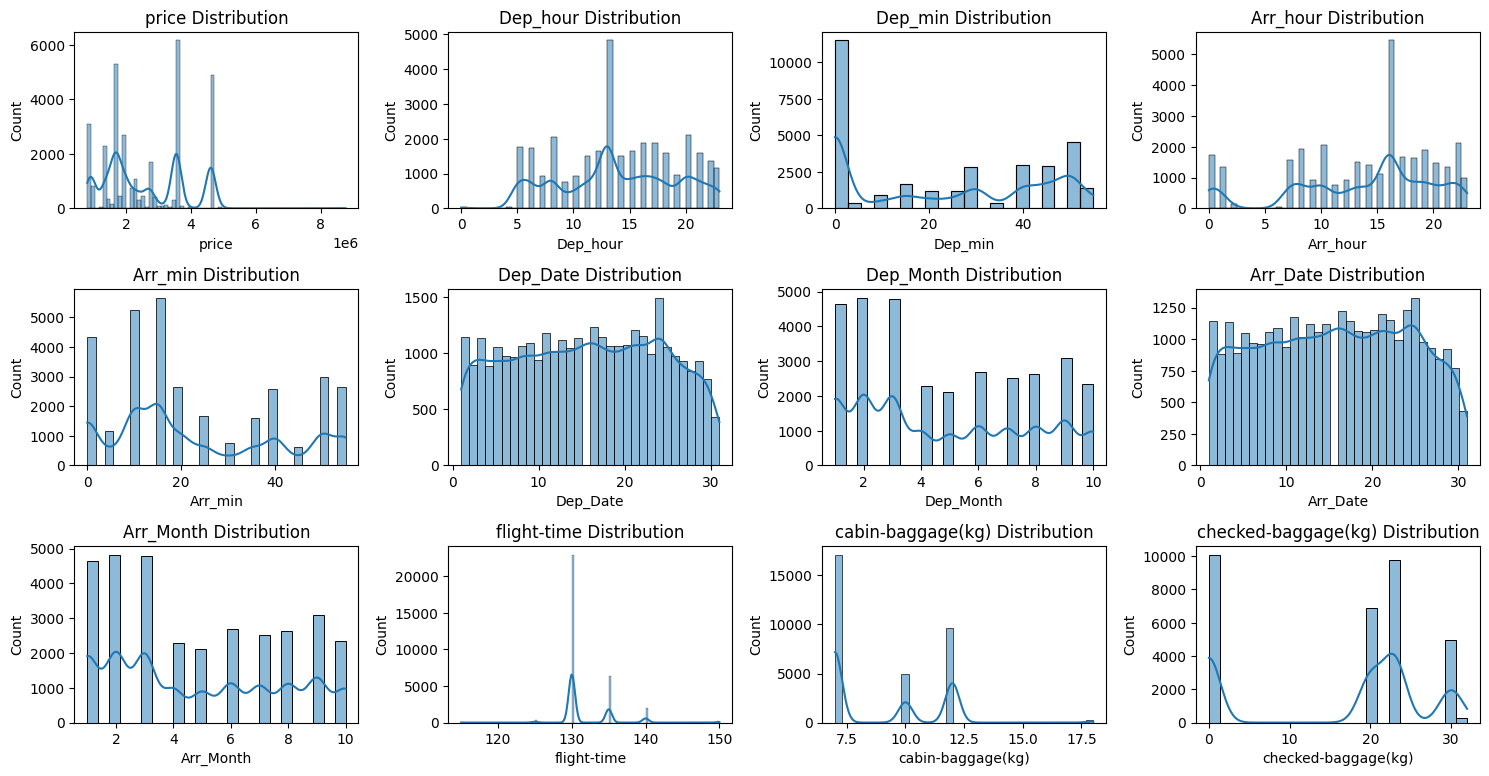

In [150]:
# numerical_features = ['Dep_hour', 'Arr_hour', 'Total_Stops', 'Total_Passenger']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(final_df[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


##Phân Loại Theo Hãng Bay (Categorical Analysis)

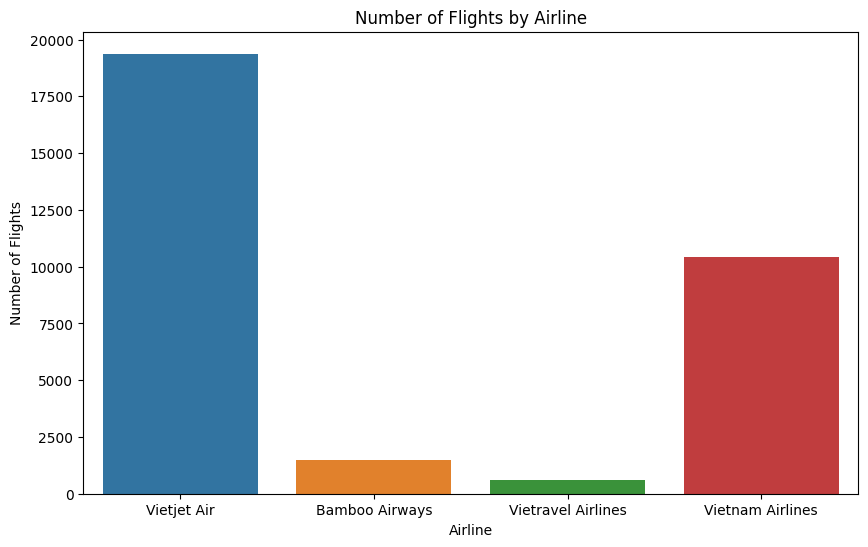

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airlines-name', data=final_df)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()


##Phân Tích Mối Quan Hệ (Relationship Analysis)

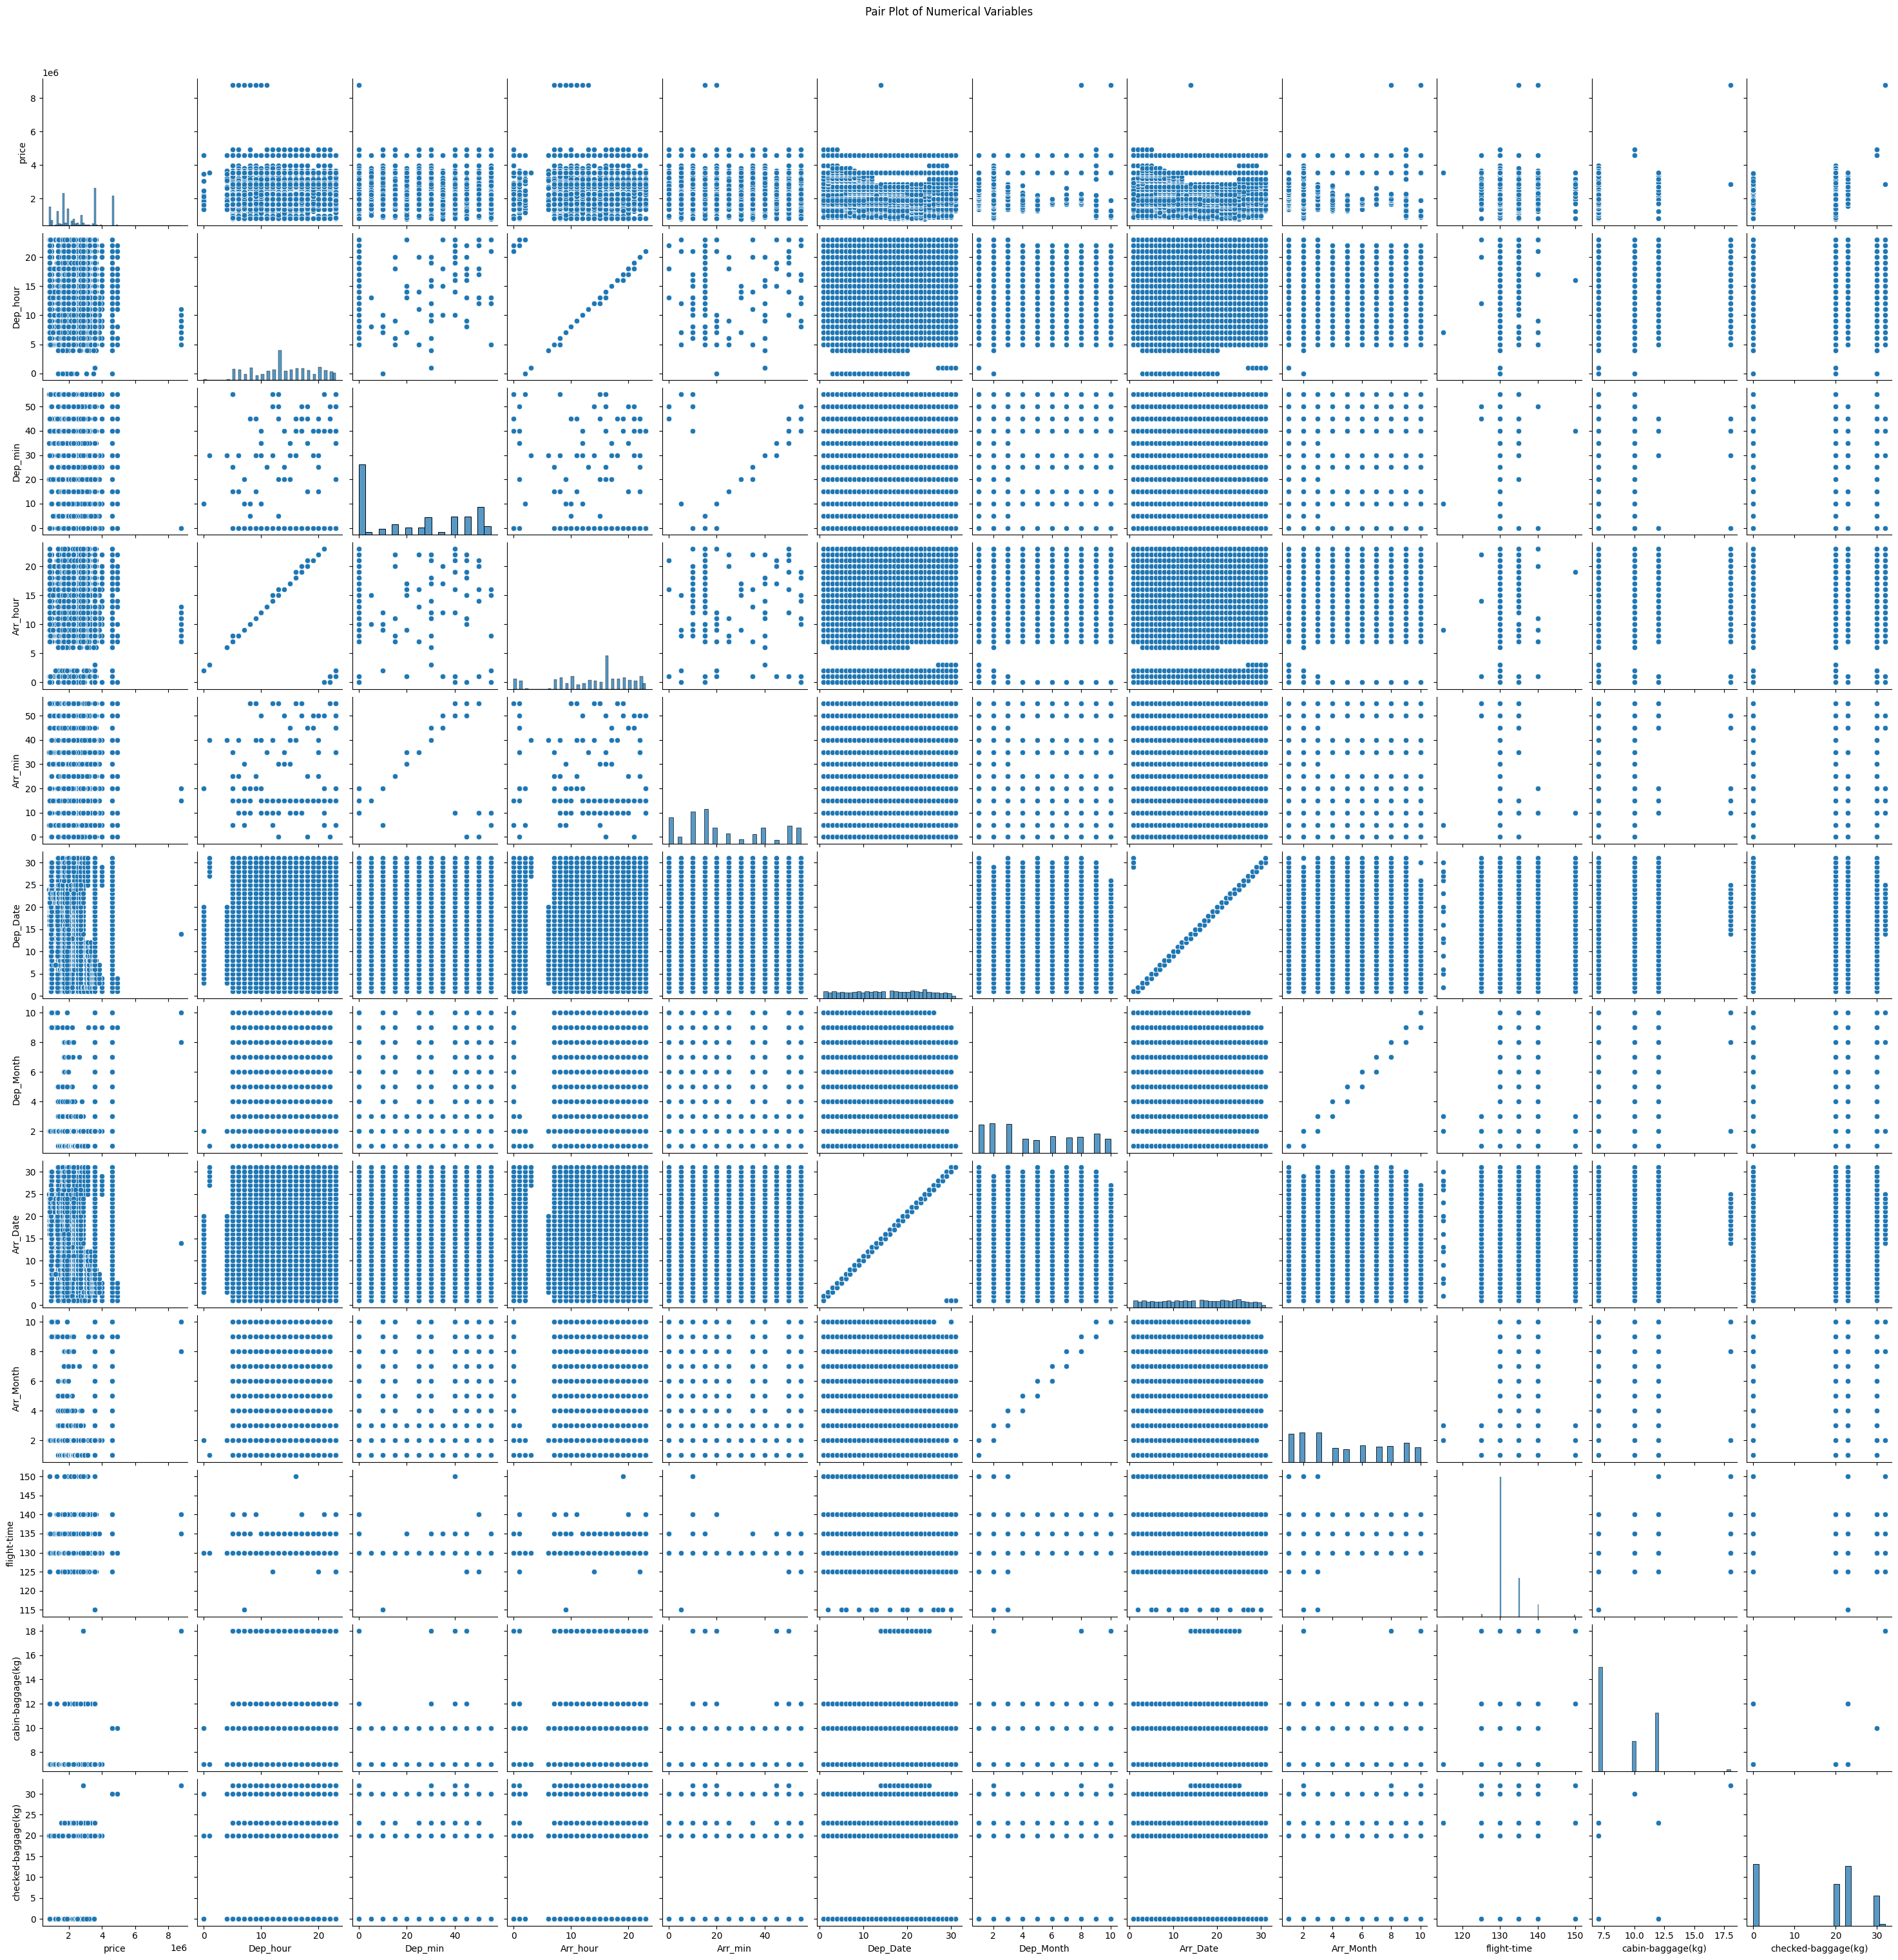

In [152]:
sns.pairplot(final_df[numerical_features])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


##Phân Tích Boxplot (Outliers)

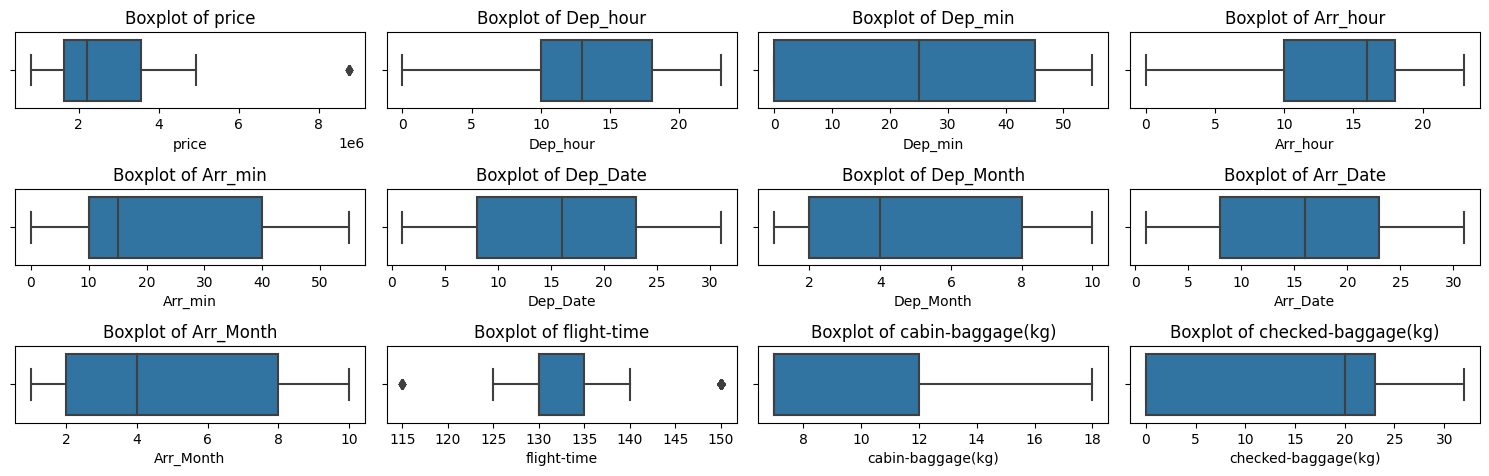

In [153]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=feature, data=final_df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()



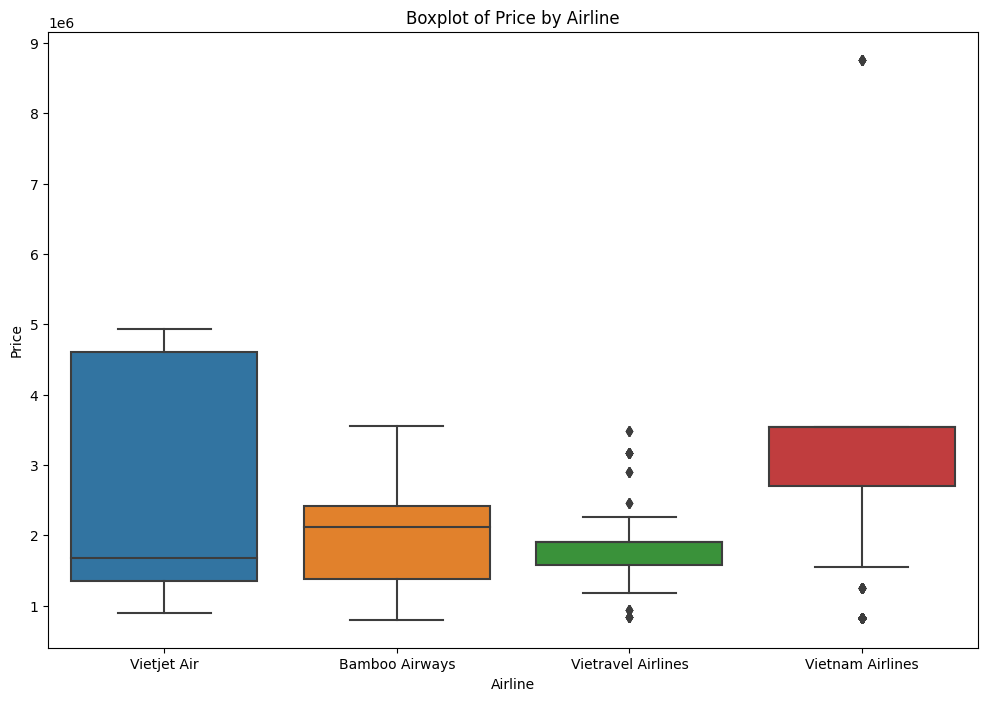

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='airlines-name', y='price', data=final_df)
plt.title('Boxplot of Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()


##Phân Tích Tương Quan (Correlation Analysis)

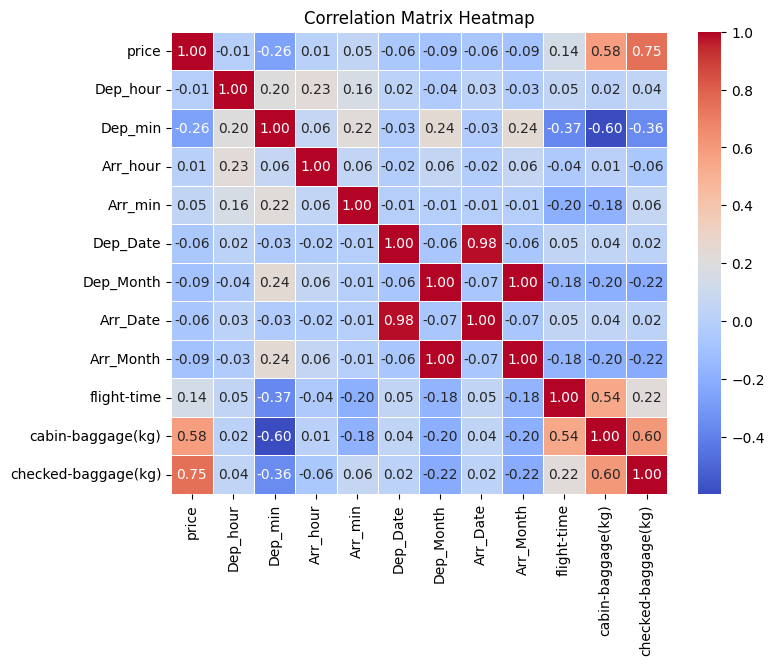

In [155]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


##ANOVA

In [156]:
# from scipy.stats import f_oneway

# # Lấy danh sách tất cả các biến phân loại
# categorical_variables = final_df.select_dtypes(include=['object']).columns.tolist()

# # Thực hiện phân tích ANOVA cho mỗi biến phân loại
# for variable in categorical_variables:
#     # Kiểm tra xem biến 'price' có sự khác biệt giữa các nhóm không
#     gr_data = final_df.groupby(variable)['price'].apply(list)
#     result = f_oneway(*gr_data)

#     print(f'ANOVA for {variable}:')
#     print(f'F-statistic: {result.statistic:.2f}')
#     print(f'p-value: {result.pvalue:.4f}')
#     print('------------------------')


In [157]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   Dep_hour             31929 non-null  int64  
 6   Dep_min              31929 non-null  int64  
 7   Arr_hour             31929 non-null  int64  
 8   Arr_min              31929 non-null  int64  
 9   Dep_Date             31929 non-null  int64  
 10  Dep_Month            31929 non-null  int64  
 11  Dep_Year             31929 non-null  int64  
 12  Arr_Date             31929 non-null  int64  
 13  Arr_Month            31929 non-null  int64  
 14  Arr_Year             31929 non-null  int64  
 15  flight-time          31929 non-null 

In [158]:
# import pandas as pd
# from scipy.stats import f_oneway

# def TimBienPhanLoaiAnhHuongGia(df, target_var, alpha=0.05):

#     categorical_vars = df.select_dtypes(include=['object']).columns
#     influential_categorical_vars = []

#     for var in categorical_vars:
#         group_data = df.groupby(var)[target_var].apply(list)
#         f_statistic, p_value = f_oneway(group_data, group_data)

#         if p_value < alpha:
#             influential_categorical_vars.append(var)

#     return influential_categorical_vars




In [159]:
# influential_categorical_vars = TimBienPhanLoaiAnhHuongGia(final_df, 'price')
# print(f"Biến kiểu phân loại ảnh hưởng đáng kể đến giá vé máy bay: {influential_categorical_vars}")

In [160]:
# import pandas as pd
# from scipy.stats import f_oneway

# def TimBienPhanLoaiAnhHuongGia(df, target_var, alpha=0.05):
#     categorical_vars = df.select_dtypes(include=['object']).columns
#     influential_categorical_vars = []

#     for var in categorical_vars:
#         group_data = [df[df[var] == category][target_var] for category in df[var].unique()]
#         f_statistic, p_value = f_oneway(*group_data)

#         if p_value < alpha:
#             influential_categorical_vars.append(var)

#     return influential_categorical_vars

# # Example usage
# influential_categorical_vars = TimBienPhanLoaiAnhHuongGia(final_df, 'price')
# print(f"Biến kiểu phân loại ảnh hưởng đáng kể đến giá vé máy bay: {influential_categorical_vars}")


In [161]:
from scipy.stats import f_oneway

# Lấy danh sách tất cả các biến phân loại
categorical_variables = final_df.select_dtypes(include=['object']).columns.tolist()

# Tạo một danh sách để lưu trữ các biến có ảnh hưởng đáng kể đến 'price'
significant_variables = []

# Thực hiện phân tích ANOVA cho mỗi biến phân loại
for variable in categorical_variables:
    # Kiểm tra xem biến 'price' có sự khác biệt giữa các nhóm không
    result = f_oneway(*[group['price'] for name, group in final_df.groupby(variable)],*[group['price'] for name, group in final_df.groupby(variable)])

    # Kiểm tra giá trị p
    p_value = result.pvalue

    # Nếu giá trị p nhỏ hơn ngưỡng chấp nhận được (ví dụ: 0.05), coi là ảnh hưởng đáng kể
    if p_value < 0.05:
        significant_variables.append(variable)
        print(f'ANOVA for {variable}:')
        print(f'F-statistic: {result.statistic:.2f}')
        print(f'p-value: {p_value:.4f} (Significant)')
        print('------------------------')
    else:
        print(f'ANOVA for {variable}:')
        print(f'F-statistic: {result.statistic:.2f}')
        print(f'p-value: {p_value:.4f}')
        print('------------------------')

# Hiển thị các biến có ảnh hưởng đáng kể đến 'price'
print('\nSignificant Variables:')
print(significant_variables)


ANOVA for flight-numb:
F-statistic: 86.77
p-value: 0.0000 (Significant)
------------------------
ANOVA for airlines-name:
F-statistic: 803.46
p-value: 0.0000 (Significant)
------------------------
ANOVA for depart-airport:
F-statistic: 0.00
p-value: 1.0000
------------------------
ANOVA for arrival-airport:
F-statistic: 0.00
p-value: 1.0000
------------------------
ANOVA for plane:
F-statistic: 585.22
p-value: 0.0000 (Significant)
------------------------
ANOVA for rank-seat-class:
F-statistic: 772.63
p-value: 0.0000 (Significant)
------------------------
ANOVA for seat-class-type:
F-statistic: 17322.46
p-value: 0.0000 (Significant)
------------------------

Significant Variables:
['flight-numb', 'airlines-name', 'plane', 'rank-seat-class', 'seat-class-type']


In [162]:
import scipy.stats as stats

In [163]:
from scipy.stats import f_oneway

# Phân tích ANOVA cho biến 'airlines-name'
airline_groups = [final_df['price'][final_df['airlines-name'] == airline] for airline in final_df['airlines-name'].unique()]

# Thực hiện phân tích ANOVA
anova_result = f_oneway(*airline_groups)

# In kết quả
print("ANOVA p-value:", anova_result.pvalue)

# Kiểm tra giả định về phân phối chuẩn
for airline, group in zip(final_df['airlines-name'].unique(), airline_groups):
    print(f"Shapiro Test for {airline}: {stats.shapiro(group)}")


ANOVA p-value: 0.0
Shapiro Test for Vietjet Air: ShapiroResult(statistic=0.7660559415817261, pvalue=0.0)
Shapiro Test for Bamboo Airways: ShapiroResult(statistic=0.8928637504577637, pvalue=5.372081123512124e-31)
Shapiro Test for Vietravel Airlines: ShapiroResult(statistic=0.8021791577339172, pvalue=5.9864235129212436e-27)
Shapiro Test for Vietnam Airlines: ShapiroResult(statistic=0.7293859124183655, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



##Label Encoder


In [164]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [165]:
# final_df['airlines-name'] = labelencoder.fit_transform(final_df['airlines-name'])
# final_df['flight-numb'] = labelencoder.fit_transform(final_df['flight-numb'])
# final_df['depart-airport'] = labelencoder.fit_transform(final_df['depart-airport'])
# final_df['arrival-airport'] = labelencoder.fit_transform(final_df['arrival-airport'])
# final_df['plane'] = labelencoder.fit_transform(final_df['plane'])
# final_df['rank-seat-class'] = labelencoder.fit_transform(final_df['rank-seat-class'])
# final_df['seat-class-type'] = labelencoder.fit_transform(final_df['seat-class-type'])

In [166]:
final_df.shape

(31929, 23)

##Onehot Encoder

In [167]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder()
# final_df['airlines-name']=ohe.fit_transform(np.array(final_df['airlines-name']).reshape(-1,1))
# final_df['flight-numb']=ohe.fit_transform(np.array(final_df['flight-numb']).reshape(-1,1))
# final_df['depart-airport']=ohe.fit_transform(np.array(final_df['depart-airport']).reshape(-1,1))
# final_df['arrival-airport']=ohe.fit_transform(np.array(final_df['arrival-airport']).reshape(-1,1))
# final_df['plane']=ohe.fit_transform(np.array(final_df['plane']).reshape(-1,1))
# final_df['rank-seat-class']=ohe.fit_transform(np.array(final_df['rank-seat-class']).reshape(-1,1))
# final_df['seat-class-type']=ohe.fit_transform(np.array(final_df['seat-class-type']).reshape(-1,1))

#Select Fetures

In [168]:
final_df

flight-numb airlines-name      price depart-airport arrival-airport  \
0           VJ198   Vietjet Air  1959500.0            SGN             HAN   
1           VJ120   Vietjet Air  1959500.0            SGN             HAN   
2           VJ122   Vietjet Air  1959500.0            SGN             HAN   
3           VJ124   Vietjet Air  1959500.0            SGN             HAN   
4           VJ128   Vietjet Air  1959500.0            SGN             HAN   
...           ...           ...        ...            ...             ...   
31924       VJ152   Vietjet Air  4605500.0            SGN             HAN   
31925       VJ166   Vietjet Air  4605500.0            SGN             HAN   
31926       VJ158   Vietjet Air  4605500.0            SGN             HAN   
31927       VJ160   Vietjet Air  4605500.0            SGN             HAN   
31928       VJ162   Vietjet Air  4605500.0            SGN             HAN   

       Dep_hour  Dep_min  Arr_hour  Arr_min  Dep_Date  Dep_Month  Dep_Year  \
0             5       15         7       25         1          1      2024   
1             6        0         8       10         1          1      2024   
2             6       30         8       40         1          1      2024   
3             7        0         9       10         1          1      2024   
4             8        5        10       15         1          1      2024   
...         ...      ...       ...      ...       ...        ...       ...   
31924        18       15        20       25        30          6      2024   
31925        20       15        22       25        30          6      2024   
31926        20       40        22       50        30          6      2024   
31927        21       55         0        5        30          6      2024   
31928        22       45         0       55        30          6      2024   

       Arr_Date  Arr_Month  Arr_Year  flight-time                plane  \
0             1          1      2024          130  Airbus A320-100/200   
1             1          1      2024          130  Airbus A320-100/200   
2             1          1      2024          130          Airbus A321   
3             1          1      2024          130          Airbus A330   
4             1          1      2024          130          Airbus A321   
...         ...        ...       ...          ...                  ...   
31924        30          6      2024          130          Airbus A321   
31925        30          6      2024          130          Airbus A321   
31926        30          6      2024          130  Airbus A320-100/200   
31927         1          7      2024          130          Airbus A321   
31928         1          7      2024          130          Airbus A321   

       cabin-baggage(kg)  checked-baggage(kg) rank-seat-class seat-class-type  \
0                      7                    0        economy           b1_eco   
1                      7                    0        economy           b1_eco   
2                      7                    0        economy           b1_eco   
3                      7                    0        economy           b1_eco   
4                      7                    0        economy           b1_eco   
...                  ...                  ...             ...             ...   
31924                 10                   30        economy          v_sboss   
31925                 10                   30        economy          v_sboss   
31926                 10                   30        economy          v_sboss   
31927                 10                   30        economy          v_sboss   
31928                 10                   30        economy          v_sboss   

       Total_Stops  Total_Passenger  
0                1                1  
1                1                1  
2                1                1  
3                1                1  
4                1                1  
...            ...              ...  
31924           

In [169]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight-numb          31929 non-null  object 
 1   airlines-name        31929 non-null  object 
 2   price                31929 non-null  float64
 3   depart-airport       31929 non-null  object 
 4   arrival-airport      31929 non-null  object 
 5   Dep_hour             31929 non-null  int64  
 6   Dep_min              31929 non-null  int64  
 7   Arr_hour             31929 non-null  int64  
 8   Arr_min              31929 non-null  int64  
 9   Dep_Date             31929 non-null  int64  
 10  Dep_Month            31929 non-null  int64  
 11  Dep_Year             31929 non-null  int64  
 12  Arr_Date             31929 non-null  int64  
 13  Arr_Month            31929 non-null  int64  
 14  Arr_Year             31929 non-null  int64  
 15  flight-time          31929 non-null 

In [170]:
final_df.columns

Index(['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dep_Date', 'Dep_Month', 'Dep_Year', 'Arr_Date', 'Arr_Month',
       'Arr_Year', 'flight-time', 'plane', 'cabin-baggage(kg)',
       'checked-baggage(kg)', 'rank-seat-class', 'seat-class-type',
       'Total_Stops', 'Total_Passenger'],
      dtype='object')

In [171]:
final_df = final_df[['flight-numb', 'airlines-name', 'price', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dep_Date', 'Dep_Month', 'Arr_Date', 'Arr_Month', 'flight-time', 'plane', 'cabin-baggage(kg)',
       'checked-baggage(kg)', 'rank-seat-class', 'seat-class-type']]

#Pipeline


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [173]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_rse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    y_bar = np.mean(y_true)
    numerator = mse * len(y_true)
    denominator = np.sum((y_true - y_bar)**2)
    rse = numerator / denominator
    return rse

def calculate_rae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    y_bar = np.mean(y_true)
    numerator = mae * len(y_true)
    denominator = np.sum(np.abs(y_true - y_bar))
    rae = numerator / denominator
    return rae


In [174]:
X = df.drop('price', axis=1)
y = df['price']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
numeric_features = ['Dep_hour','Dep_min', 'Arr_hour', 'Arr_min', 'Dep_Date','Dep_Month','Arr_Date','Arr_Month','flight-time','cabin-baggage(kg)', 'checked-baggage(kg)']
categorical_features = ['airlines-name', 'flight-numb', 'plane', 'rank-seat-class', 'seat-class-type']

In [177]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [178]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [179]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

##Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
model = RandomForestRegressor()
rfm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])

In [182]:
# Huấn luyện mô hình
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)
# Đánh giá mô hình trên tập kiểm thử
score = rfm.score(X_test, y_test)
print(f'rfm R^2 Score: {score}')

rfm R^2 Score: 0.9998708840243511


In [183]:
print('MAE:', metrics.mean_absolute_error(y_test, rfm_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfm_pred)))
print('RAE:', calculate_rae(y_test, rfm_pred))
print('RSE:', calculate_rse(y_test, rfm_pred))


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
# Tạo biểu đồ scatter plot
plt.scatter(y_test, rfm_pred, color='blue')
# plt.scatter(df['name'], y, color='red', label='Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='solid')

# Đặt tên cho trục x và trục y
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Actual vs Predicted Car Prices')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

##Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()
gbrm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])

In [ ]:
# Huấn luyện mô hình
gbrm.fit(X_train, y_train)
gbrm_pred = gbrm.predict(X_test)
# Đánh giá mô hình trên tập kiểm thử
score = gbrm.score(X_test, y_test)
print(f'gbrm R^2 Score: {score}')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, gbrm_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbrm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbrm_pred)))

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
# Tạo biểu đồ scatter plot
plt.scatter(y_test, gbrm_pred, color='blue')
# plt.scatter(df['name'], y, color='red', label='Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='solid')

# Đặt tên cho trục x và trục y
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Actual vs Predicted Car Prices')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

##SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')
svrm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])

In [ ]:
# Huấn luyện mô hình
svrm.fit(X_train, y_train)
svrm_pred = svrm.predict(X_test)
# Đánh giá mô hình trên tập kiểm thử
score = svrm.score(X_test, y_test)
print(f'svrm R^2 Score: {score}')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, svrm_pred))
print('MSE:', metrics.mean_squared_error(y_test, svrm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svrm_pred)))

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
# Tạo biểu đồ scatter plot
plt.scatter(y_test, svrm_pred, color='blue')
# plt.scatter(df['name'], y, color='red', label='Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='solid')

# Đặt tên cho trục x và trục y
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Actual vs Predicted Car Prices')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

##Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Tạo mô hình Decision
model = DecisionTreeRegressor()
dtm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])
# Huấn luyện mô hình trên tập huấn luyện
dtm.fit(X_train, y_train)


In [ ]:
dtm_pred = dtm.predict(X_test)

In [ ]:
score = dtm.score(X_test, y_test)
print(f'Model R^2 Score: {score}')

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE on Train Set: {mse_train}")
print(f"MSE on Test Set: {mse_test}")


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, dtm_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtm_pred)))

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dtm, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.legend()
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
# Tạo biểu đồ scatter plot
plt.scatter(y_test, dtm_pred, color='blue')
# plt.scatter(df['name'], y, color='red', label='Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='solid')

# Đặt tên cho trục x và trục y
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Actual vs Predicted Car Prices')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

##Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
lrm = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', model)])

In [ ]:
# Huấn luyện mô hình
lrm.fit(X_train, y_train)
lrm_pred = lrm.predict(X_test)
# Đánh giá mô hình trên tập kiểm thử
score = lrm.score(X_test, y_test)
print(f'lrm R^2 Score: {score}')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lrm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lrm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lrm_pred)))

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,6))
# Tạo biểu đồ scatter plot
plt.scatter(y_test, lrm_pred, color='blue')
# plt.scatter(df['name'], y, color='red', label='Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='solid')

# Đặt tên cho trục x và trục y
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Actual vs Predicted Car Prices')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

#Evaluate

##Performance

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dự đoán trên tập kiểm thử cho từng mô hình
y_linear_pred = lrm.predict(X_test)
y_tree_pred = dtm.predict(X_test)
y_gbr_pred = gbrm.predict(X_test)
y_rf_pred = rfm.predict(X_test)
y_svm_pred = svrm.predict(X_test)

# Tính R2_score cho từng mô hình
r2_linear = r2_score(y_test, y_linear_pred)
r2_tree = r2_score(y_test, y_tree_pred)
r2_gbr = r2_score(y_test, y_gbr_pred)
r2_rf = r2_score(y_test, y_rf_pred)
r2_svm = r2_score(y_test, y_svm_pred)

# Biểu đồ so sánh R2_score giữa các mô hình
models = ['Linear Regression', 'Decision Tree', 'Gradient Boosting Regression', 'Random Forest', 'SVM']
r2_scores = [r2_linear, r2_tree, r2_gbr, r2_rf, r2_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green','red','yellow','orange'])

# Đặt các thông số đồ thị
plt.title('Comparison of R2 Score between Different Models')
plt.ylabel('R2 Score')

# Hiển thị biểu đồ
plt.show()


In [ ]:
import matplotlib.pyplot as plt

mse_linear = mean_squared_error(y_test, y_linear_pred)
mae_linear = mean_absolute_error(y_test, y_linear_pred)

mse_tree = mean_squared_error(y_test, y_tree_pred)
mae_tree = mean_absolute_error(y_test, y_tree_pred)

mse_gbr = mean_squared_error(y_test, y_gbr_pred)
mae_gbr = mean_absolute_error(y_test, y_gbr_pred)

mse_rf = mean_squared_error(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)

mse_svm = mean_squared_error(y_test, y_svm_pred)
mae_svm = mean_absolute_error(y_test, y_svm_pred)

# Biểu đồ so sánh các thang đo giữa các mô hình
models = ['Linear Regression', 'Decision Tree', 'Gradient Boosting Regression', 'Random Forest', 'SVM']
mse_scores = [mse_linear, mse_tree, mse_gbr, mse_rf, mse_svm]
mae_scores = [mae_linear, mae_tree, mae_gbr, mae_rf, mae_svm]





In [ ]:
# Biểu đồ cột cho MSE
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(models, mse_scores, color='blue', label='MSE')
# Đặt các thông số đồ thị
ax.set_title('Comparison of MSE and MAE between Different Models')
ax.set_ylabel('Error')

plt.show()

In [ ]:
# Biểu đồ cột cho MAE
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(models, mae_scores, color='red', label='MAE', alpha=0.7)
# Đặt các thông số đồ thị
ax.set_title('Comparison of MSE and MAE between Different Models')
ax.set_ylabel('Error')
plt.show()



##T

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfm, X, y, cv=cv, scoring='r2')

print(f'Mean R^2 Score across folds: {scores.mean()}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sử dụng Learning Curve để đánh giá mô hình
plot_learning_curve(dtm, X, y, cv=cv, n_jobs=-1)
plt.show()


In [ ]:
# Sử dụng Learning Curve để đánh giá mô hình
plot_learning_curve(lrm, X, y, cv=cv, n_jobs=-1)
plt.show()

In [ ]:
# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Dự đoán giá trên tập kiểm thử
y_pred = model.predict(X_test)

# Tính Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on Test Set: {mse}')


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Saving the model

In [ ]:
import pickle

In [ ]:
file = open('flight_model_RF.pkl', 'wb')

In [ ]:
pickle.dump(model, file)

In [ ]:
model=open('flight_model_RF.pkl', 'rb')
flight_price=pickle.load(model)

#DEMO

In [ ]:
final_df.columns

Index(['flight-numb', 'airlines-name', 'price', 'depart-airport',
       'arrival-airport', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Dep_Date', 'Dep_Month', 'Dep_Year', 'Arr_Date', 'Arr_Month',
       'Arr_Year', 'flight-time', 'plane', 'cabin-baggage(kg)',
       'checked-baggage(kg)', 'rank-seat-class', 'seat-class-type',
       'Total_Stops', 'Total_Passenger'],
      dtype='object')

In [ ]:
flight_price.predict(pd.DataFrame(columns=['flight-numb', 'airlines-name', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min','Dep_Date', 'Dep_Month', 'Arr_Date', 'Arr_Month', 'flight-time', 'plane', 'cabin-baggage(kg)','checked-baggage(kg)', 'rank-seat-class', 'seat-class-type'],data=np.array(['VJ198','Vietjet Air','5','15','7','25','1','1','1','1','130','Airbus A320-100/200','7','0','economy' ,'b1_eco']).reshape(1,16)))

array([1959500.])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Giả sử model là mô hình đã được huấn luyện trước đó
model = LinearRegression()

# Chuẩn bị dữ liệu đầu vào
flight_numb = input("Nhập mã chuyến bay: ")
airlines_name = input("Nhập tên hãng bay: ")
dep_hour = int(input("Nhập giờ khởi hành: "))
dep_min = int(input("Nhập phút khởi hành: "))
arr_hour = int(input("Nhập giờ kết thúc: "))
arr_min = int(input("Nhập phút kết thúc: "))
dep_date = int(input("Nhập ngày khởi hành: "))
dep_month = int(input("Nhập tháng khởi hành: "))
arr_date = int(input("Nhập ngày kết thúc: "))
arr_month = int(input("Nhập tháng kết thúc: "))
flight_time = int(input("Nhập thời gian bay: "))
plane = (input("Nhập tên máy bay: "))
cabin_baggage = int(input("Nhập số kg hành lý xách tay: "))
checked_baggage = int(input("Nhập số kg hành lý kí gửi: "))
rank_seat = (input("Nhập hạng vé: "))
seat_type = (input("Nhập loại chỗ ngồi: "))
# Thêm các trường dữ liệu khác tương tự

input_data = pd.DataFrame({
    'flight-numb': [flight_numb],
    'airlines-name': [airlines_name],
    'Dep_hour': [dep_hour],
    'Dep_min': [dep_min],
    # Thêm các trường dữ liệu khác tương tự
})

# Dự đoán giá vé máy bay
prediction = model.predict(input_data)

print(f'Predicted Flight Price: {prediction[0]}')
